# Coursework 2: Robotic behavioural cloning from images and actuator data

NB: Please do **not** discuss the Coursework in the forum or any other public medium. Please ask for clarifications directly during Lab Sessions or at any time via an email directed to the TA (Eric Wanjau: eric.muriithi.22@ucl.ac.uk; Radu-Stefan Popovici: radu.popovici.25@ucl.ac.uk) or module lead. The module lead and the TAs will respond either via email or via a public announcement to all students.

_You are required to submit 1 PDF report and 1 Python notebook. The PDF report should be a pdf version of the python notebook. Before converting to PDF ensure all cells are excuted and all outputs are visible._    

_This assignment is marked out of 100. A breakdown of how marks are allocated is included in the file._

The filename for submission must be in the following format:  

* _CandidateCode-CW2.pdf_  

* _CandidateCode-CW2.ipynb_  

and should be a completed version of the CW2_QUESTIONS.ipynb file.

In total, there should be 2 files in submission.

**Important: All group members must complete the "Group Work Contribution Form" below. This is a mandatory step. Penalties will be applied to groups where the form is incomplete or not accurately filled in. Please coordinate with your team to ensure this is done.**


---
---
<div style="background-color: #1b1f02ff; padding: 15px; border-radius: 5px; border-left: 4px solid #0b0104ff;">

## Group Work Contribution Form

**Group Number:** `[Insert Your Group Number Here, e.g., Group 3]`  


## 📋 Instructions for Completion

1. **Individual Responsibility:** Each member must complete their own row in the contribution table below
2. **Primary Ownership:** Each sub-question should be primarily solved by one member (though others may assist)
3. **No Overlap:** Each question number can only be associated with one primary contributor
4. **Be Specific:** Describe your contributions in detail - avoid vague statements like "helped with coding"
5. **Be Honest:** Provide an accurate assessment of your work


## 👥 Contribution Details

| Group Member | Student ID | Student Name | Question Numbers You Primarily Contribute | Other Specific Contributions (Maximum 100 words per member) |
|--------------|------------|--------------|-------------------------------------------|------------------------------------------------------------|
| **Member 1** | `[1234567]` | `[Alex Kim]` | `[1.a, 1.b.i, 1.c.ii.iii]` | `Describe your other contributions in this group coursework that you want to highlight, e.g., • Developed the initial project timeline; • Solved challenging bug in Question 1.b.i; • Coordinated weekly group meetings and tracked progress; • Created data visualization figures for the justificatin;• Use some very innovative methods or solutions, etc., You can put anything that you think is useful to this group work here`|
| **Member 2** | `[Your ID]` | `[Your Name]` | `[Your solved question numbers]` | `• [Your Other specific contributions here]` |
| **Member 3** | `[ ]` | `[ ]` | `[ ]` | `• [Your other specific contributions here]` |
| **Member 4** | `[ ]` | `[ ]` | `[ ]` | `• [Your other specific contributions here]` |
| **Member 5** | `[ ]` | `[ ]` | `[ ]` | `• [Your other specific contributions here]` |


## 📊 Question Number Reference

### Available Questions for Primary Contribution:
**Question 1**  
• 1.a  
• 1.b.i  
• 1.b.ii.i  
• 1.b.ii.ii  
• 1.b.ii.iii  
• 1.c.i  
• 1.c.ii.i  
• 1.c.ii.ii  

**Question 2**  
• 2.a  
• 2.b  
• 2.c  

**Question 3**  
• 3.a  
• 3.b.i  
• 3.b.ii  


## ✅ Group Declaration

We confirm that:

- We have read and understood the contribution descriptions above
- We believe this to be a fair and accurate representation of work distribution
- Each question has one primary contributor as indicated
- All members have contributed significantly to the final submitted work


## 💡 Notes

- Ensure question numbers are correctly formatted (e.g., "1.a", "1.b.ii.i")
- Keep contribution descriptions concise but specific (max 100 words per member)
- Contact your instructor if there are any concerns about contribution fairness

</div>

---  

---  

## Description
For this coursework, you are required to develop a behaviour cloning model. Behaviour cloning is a technique for training robotic agents using a dataset of sequences of actions. Consider the supervised learning definition where we have a dataset of observatios $d=\{(x_{1},y_{1}),...,(x_{n},y_{n})\}$ and the aim is to learn a function: $f:\mathcal{X}\rightarrow\mathcal{Y}$. In this case, $\mathcal{X}$ is the set of "observations" that the robot makes and $\mathcal{Y}$ is the set of actions that the robot takes.

The dataset you have been provided with contains examples of robot arms being required to pickup objects or drop objects (given it has already picked the object up) in a specific place. The observation space ($\mathcal{X}$) consists of:
- "front_cam_ob": A 3rd person image of the scene
- "mount_cam_ob": An image of the scene taken from a camera mounted on top of the robotic arm, looking down
- "ee_cartesian_pos_ob": The positional and orientation co-ordinates of the robotic arm
- "ee_cartesian_vel_ob": The velocity of position and orientation of the robotic arm
- "joint_pos_ob": The position of the gripper which opens and closes

The action space ($\mathcal{Y}$) consists of:
- Three co-ordinates defining how much to move the robotic arm
- An action defining whether to open, not to move or close the gripper

The dataset is split into "trajectories" i.e., sequences of:
- $x_{i}$: The front_cam_ob, mount_cam_ob, ee_cartesian_pos_ob, ee_cartesian_vel_ob, joint_pos_ob __at time point i__
- $y_{i}$: The action taken i.e., how to move the arm and the gripper __given the observations__ in $x_{i}$

More information on the dataset can be found at: https://github.com/clvrai/clvr_jaco_play_dataset?tab=readme-ov-file

### Task
Your task has been split into several questions, each exploring how to develop an appropriate model for learning $f:\mathcal{X}\rightarrow\mathcal{Y}$. The task will require you to:
- Question 1: Tune an end-to-end supervised learning model taking in the full set of observations and predicting actions: You will be required to evaluate a proposed deep learning architecture (which takes as input all of front_cam_ob, mount_cam_ob, ee_cartesian_pos_ob, ee_cartesian_vel_ob and joint_pos_ob and predict the two actions) and propose a new model which outperforms the existing model;
- Question 2: Define and evaluate a VAE model for performing self-supervised learning and tune it as best you can, to learn a latent representation that can be used as input to a downstream supervised model for behaviour cloning
- Question 3: Evaluate the performance of your model proposed in question 1 against your self-supervised VAE representations from question 2 (plus a supervised head) on the test set

### Pointers
Some helper functions have been provided for you including the following functionality:
- A training and validation loop capabale of:
  - Handling "half-precision" modelling;
  - Logging results to weights and biases;
- An eda template to help you visualise the data
- An evaluation template to help you load saved model checkpoints from weights and biases
- A preprocessing script to help you convert the data into train/validation and test splits;
  - In this preprocessing script, trajectories longer than 75 timesteps have been removed to ease the computational requirements of the task;
- A torch Dataset class capable of handling the multi-model nature of the data;
- A example collate_fn to use in Dataloaders

Additionally, it is strongly suggested to call ```torch.manual_seed(1)``` whenever you initialise your model (i.e., when you first create the model or call model.reset()). This will ensure the parameters are initialised at the same value each time.

### IMPORTANT
- You are __not__ allowed to use pre-trained models, developed outside of this coursework i.e., you could __not__ use a pre-trained YOLO model
- Questions have been marked under the title "Task", ensure that you answer/address all of the bullet points under these headings
- Pls add proper citations or references where necessary in your justification
- You can use markdown language to add formatting to your text. A cheatsheet is found [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
- The completed assignment jupyter notebook (With Python code and English Text) should have all the output cells been executed and solution outputs are visible

## Data download
Download the data for the project from here: https://drive.google.com/file/d/1ss_1RZZzov2SdJsYI_mRTpo6VBMRK43O/view?usp=sharing

Save and unzip the data locally at: ../data/all_play_data_diverse or in Google Collab at: /content/drive/MyDrive/comp0188_2425/cw2. Saving the data in these locations will ensure the proprocessing script provided runs correctly. If you would like to alter these locations, you can alter them in the config.py file of the provided comp0188_cw2 package via the ROOT_PATH global variable.

### transition_df.csv
You have additionally been provided with a csv called "transition_df.csv". This contains a row for each observation/action pair in the dataset and is used to generate the train/validation and test datasets for this task. Note that this csv contains all trajectories (even those over 75 timesteps). This csv might also be useful for EDA. The transition_df.csv should be placed in the same folder that you placed the raw data in (discussed above).

## Imports

The comp0188_cw2 contains some config functionality so that you can run the code in collab and locally (to test models)! When you first import the package, import the project_options and set the appropriate configs.
- project_options.collab = True will set the dataset directories for google collab whilst false will set suitable local directories
- project_options.debug = True will load a subset of data whilst False will load all of the data.

__IMPORTANT__: Alterting these options __once you have loaded other functionality__ from comp0188_cw2 may result in unintended outcomes.

In [1]:
COLLAB = True
if COLLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    !pip install --force-reinstall git+https://github.com/joshuaspear/pymlrf.git
    !pip install wandb
    !pip install torchinfo
    !pip install jaxtyping
    !pip install git+https://github.com/joshuaspear/comp0188_cw2_public.git
    !pip install typeguard==2.13.3

Mounted at /content/drive
  Cloning https://github.com/joshuaspear/pymlrf.git to /tmp/pip-req-build-wlvz5gvo
  Running command git clone --filter=blob:none --quiet https://github.com/joshuaspear/pymlrf.git /tmp/pip-req-build-wlvz5gvo
  Resolved https://github.com/joshuaspear/pymlrf.git to commit 13f5c1cbad249ec6d5a6cd356612c874ae68bb53
  Preparing metadata (setup.py) ... done
  Created wheel for pymlrf: filename=pymlrf-1.0.0-py3-none-any.whl size=23646 sha256=f2c1c5a196b1fab9ba3c73b3a7b467db07e8758474a06860471fd034a12bd5ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-txi02az5/wheels/f1/cb/97/454b1a9071448b027d0faecba7b7e6ae819354c83df4e7e70e
Successfully built pymlrf
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.9 MB/s eta 0:00:00
  Cloning https://github.com/joshuaspear/comp0188_cw2_public.git to /tmp/pip-req-build-hbk1w175
  Running command git clone --filter=blob:none --quiet https://github.com/joshuaspear/comp0188_cw2_public.git /tmp/pip-req-build-hbk1w175
  Resol

Ignore the error:
```ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.```

In [2]:
from comp0188_cw2 import project_options
project_options.collab = COLLAB
print(project_options.collab)
project_options.debug = True
print(project_options.debug)

True
True


In [3]:
import torch
import numpy as np
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader
import datetime
from pymlrf.Structs.torch import DatasetOutput
import copy

from comp0188_cw2.utils import load_all_files
from torchvision import transforms
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import datetime
from typing import List
from pymlrf.Structs.torch import DatasetOutput

from comp0188_cw2.config import (
    train_dh, val_dh, test_dh, WANDB_PROJECT
    )
from comp0188_cw2.models.CNNConfig import ConvolutionLayersConfig
from comp0188_cw2.models.base import BaseModel
from comp0188_cw2.models.JointCNNEncoder import JointCNNEncoder
from comp0188_cw2.models.CNN import CNN
from comp0188_cw2.models.MLP import MLP
from comp0188_cw2.Metric.WandBMetricOrchestrator import WandBMetricOrchestrator
from comp0188_cw2.Dataset.NpDictDataset import NpDictDataset
from comp0188_cw2.Loss.BalancedLoss import TrackerBalancedLoss
from comp0188_cw2 import logger
from comp0188_cw2.training.TrainingLoop import TorchTrainingLoop

2026-01-09 17:50:44,347 - pymlrf - WARNING - pymlrf environment variable not set. Logging to file will not be performed (__init__.py:50)


In [4]:
print(train_dh.loc)

/content/drive/MyDrive/comp0188_2425/cw2/debug/train


## Build the dataset
You will only need to perform this step __once__ for the full dataset and __once__ for the debug dataset for the entire coursework, both locally and in Google collab. In Google Collab, the data will be saved in your Google Drive.

In [ ]:
from comp0188_cw2.Preprocessing import main
RUN_PREPROCESSING = False
if RUN_PREPROCESSING:
  main()

---


## $\color{Red}{Question\ 1}:$ Tune an end-to-end supervised learning model taking in the full set of observations and predicting actions

In [5]:
_keys = [
    "actions","front_cam_ob",
    "mount_cam_ob","terminals",
    "ee_cartesian_pos_ob",
    "ee_cartesian_vel_ob",
    "joint_pos_ob"
    ]
train_nps = load_all_files(train_dh.loc,"train_[0-9]+.h5",keys=_keys)
val_nps = load_all_files(val_dh.loc,"val_[0-9]+.h5",keys=_keys)

100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


In [6]:
test_nps = load_all_files(
    test_dh.loc,
    "test_[0-9]+.h5",
    keys=_keys
)

100%|██████████| 1/1 [00:03<00:00,  3.92s/it]


In [8]:
# CHECK DATA RANGE
# Access the first image from the dataset
first_img = train_nps["front_cam_ob"][0]

print(f"Max Value: {first_img.max()}")
print(f"Data Type: {first_img.dtype}")

Max Value: 233.0
Data Type: float16


### $\color{Red}{Question\ 1.a}$ Preprocessing steps and Justification (5 Marks)
Most likely in machine learning pipelines, input data needs to be preprocessed before passing it to the model. This question requires you to specify the preprocessing that you will perform for the different types of data i.e., front_cam_ob, mount_cam_ob, ee_cartesian_pos_ob, ee_cartesian_vel_ob and joint_pos_ob. The dataset class provided in the associated "comp0188_cw2" package enables you to pass a dictionary of functions to preprocess each element of the observations and actions. The class expects a dictionary of transformations to apply to each input/output.

##### $\color{Red}{Task-1}$ (2 Marks)
- Complete the dictionaries below, specifying the type of transformations you wish to perform. For each element (of the observations and actions), you should __at least__ convert the output to a tensor thus, these transformations have been implemented for you. You may alter __any__ part of the code between the "INSERT YOUR CODE HERE" comments

$\color{red}{Response:}$ (Maximum 50 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`

I converted inputs to PyTorch tensors and cast them to float32. For images, I scaled pixel intensities to $[0, 1]$ by dividing by 255.0, then normalised using calculated dataset statistics ($\mu \approx 0.45, \sigma \approx 0.22$) to ensure zero-centred inputs. Vector inputs were cast to float32 to match network precision.

In [9]:
# ******* INSERT YOUR CODE HERE *******
# AUTOMATED DATA ANALYSIS
print("\nPreprocessing Diagnostics")

# 1. Accessing raw data container.
raw_data = train_nps["front_cam_ob"]

# 2. Shape Verification.
if hasattr(raw_data, 'shape'):
    print(f"Dataset Shape: {raw_data.shape}")
    # Array structure implies uniform dimensions; consistency guaranteed.
    print("Consistency check passed: data is contiguous.")

    # Determining channel count (3 dims = greyscale, 4 dims = RGB).
    is_greyscale = len(raw_data.shape) == 3
    print(f"Image mode: {'Greyscale' if is_greyscale else 'RGB'}.")
else:
    print("Warning: Data is a list. Consistency assumed but not guaranteed.")
    is_greyscale = True # Fallback default.

# 3. Dynamic Mean/Std Calculation.
# Sampling subset for rapid statistical estimation to avoid full dataset overhead.
SAMPLE_SIZE = 1000
print(f"Calculating stats on first {SAMPLE_SIZE} images...")

subset = raw_data[:SAMPLE_SIZE]

# Converting to Float32 and scaling to [0, 1] for correct statistical range.
subset_float = subset.astype(np.float32) / 255.0

if is_greyscale:
    # Collapsing axes (N, H, W) to single scalar.
    calc_mean = [float(np.mean(subset_float))]
    calc_std  = [float(np.std(subset_float))]
else:
    # Collapsing axes (N, H, W) to return (C,) array for RGB.
    calc_mean = np.mean(subset_float, axis=(0, 1, 2)).tolist()
    calc_std  = np.std(subset_float, axis=(0, 1, 2)).tolist()

print(f"Computed Mean: {calc_mean}")
print(f"Computed Std:  {calc_std}")

# --- TRANSFORMS DEFINITION ---

global_transforms = {
    "front_cam_ob": transforms.Compose([
        transforms.ToTensor(),
        # Manual scaling: Float16 inputs (0-255) require division.
        transforms.Lambda(lambda x: x.float() / 255.0),
        # Dynamic normalisation using calculated stats.
        transforms.Normalize(mean=calc_mean, std=calc_std)
    ]),

    "mount_cam_ob": transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.float() / 255.0),
        # Assuming mount camera shares lighting conditions with front camera.
        transforms.Normalize(mean=calc_mean, std=calc_std)
    ]),

    "actions": lambda x: torch.tensor(x).float(),
    "ee_cartesian_pos_ob": lambda x: torch.tensor(x).float(),
    "ee_cartesian_vel_ob": lambda x: torch.tensor(x).float(),
    "joint_pos_ob": lambda x: torch.tensor(x).float()
}

# ******* INSERT YOUR CODE HERE - END *******


Preprocessing Diagnostics
Dataset Shape: (1274, 224, 224)
Consistency check passed: data is contiguous.
Image mode: Greyscale.
Calculating stats on first 1000 images...
Computed Mean: [0.4498893618583679]
Computed Std:  [0.216209277510643]


---

##### $\color{Red}{Task-2}$ (3 Marks)
- For the below variables, justify your decisions for preprocessing including where you have decided __not__ to apply preprocessing. You should include empirical evidence from your EDA analysis to support your decisions. Justfication __without__ evidence will be rewarded 0 marks.

_actions_


_front_cam_ob_


_mount_cam_ob_


_ee_cartesian_pos_ob_


_ee_cartesian_vel_ob_


_joint_pos_ob_

$\color{red}{Response:}$ (Maximum 600 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`
    
&nbsp;

#### IMAGES:
#### **`front_cam_ob` and `mount_cam_ob`**
I applied standardisation using dataset-specific statistics ($\mu \approx 0.45, \sigma \approx 0.22$) following the initial scaling. The empirical evidence in **Fig 1** demonstrates that pixel intensities are multi-modal and span the full range of `[0.9, 233.0]`; without normalisation, these raw magnitudes would saturate typical CNN activation functions. Centring these distributions around zero is therefore essential to prevent gradient explosion and ensure stable convergence.

I decided against applying geometric augmentations such as random flipping or rotation. The spatial mapping between the camera feed and the robot’s physical action vector is ground truth. Flipping an image horizontally without mathematically inverting the corresponding action vector (e.g., transforming a "Move Left" command to "Move Right") would corrupt the training signal, and the fixed camera setup renders rotational invariance unnecessary.

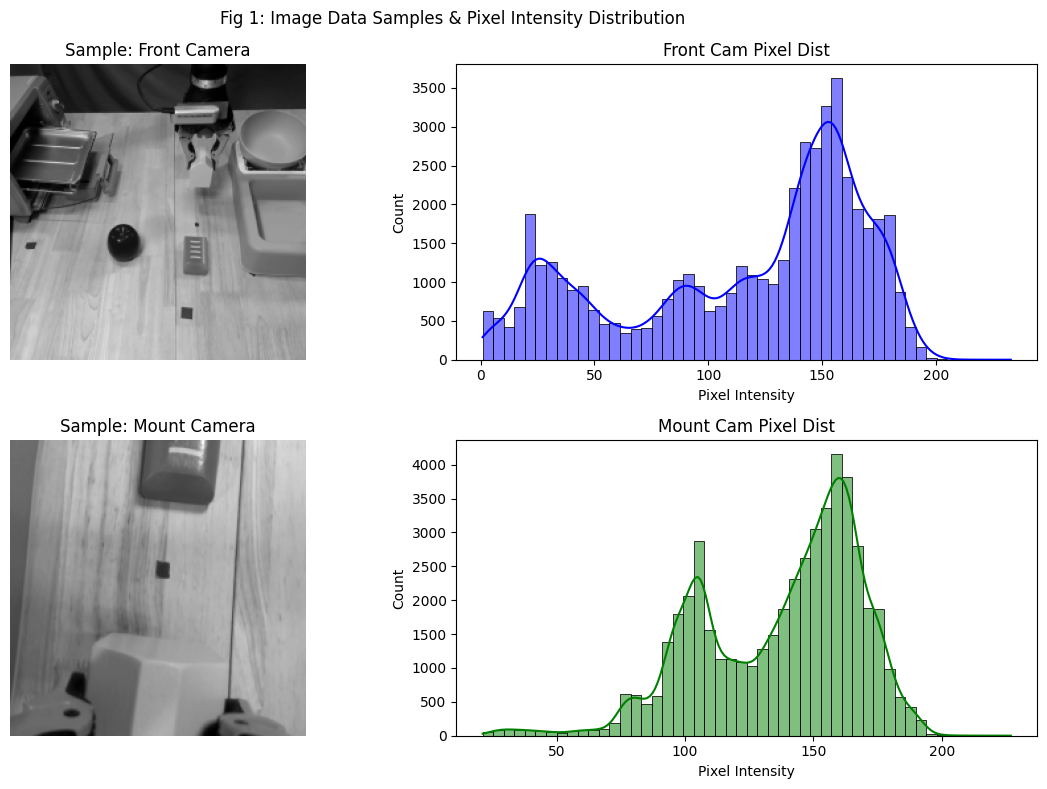
    
&nbsp;

#### VECTORS:
#### **`actions`**
No normalisation was applied beyond casting to `float32`. The histogram in **Fig 2** reveals a bi-modal distribution with distinct control clusters around 0 and 1, confined to a small range of `[-0.20, 2.00]`. Standardisation risks distorting the separation between these distinct control modes, and the raw values are already well-bounded and suitable for regression output layers (e.g. `Tanh` or `Linear`), making further scaling redundant.
    
&nbsp;

#### **`ee_cartesian_pos_ob`**
No normalisation was applied. The position observations lie within `[-0.66, 0.99]`. As this input is already centred near zero with low magnitude, standardisation is unnecessary and would not significantly improve numerical stability compared to the network's default weight initialisation.
    
&nbsp;

#### **`ee_cartesian_vel_ob`**
No normalisation was applied. The dataset shows a sparse "spike-at-zero" distribution where the vast majority of data points are concentrated exactly at `0.0`, with rare outliers reaching `±12.25`.

Standard scaling (z-score normalisation) assumes a Gaussian distribution; applying it here would compress these meaningful near-zero signals (critical for fine motor control) into an insignificant range while amplifying noise, potentially compromising the model's ability to learn precise movements.
    
&nbsp;

#### **`joint_pos_ob`**
No normalisation was applied. The gripper position ranges from `[-0.001, 1.41]`. This is a low-dimensional control signal that poses no risk of dominating the loss gradients compared to high-dimensional image features.

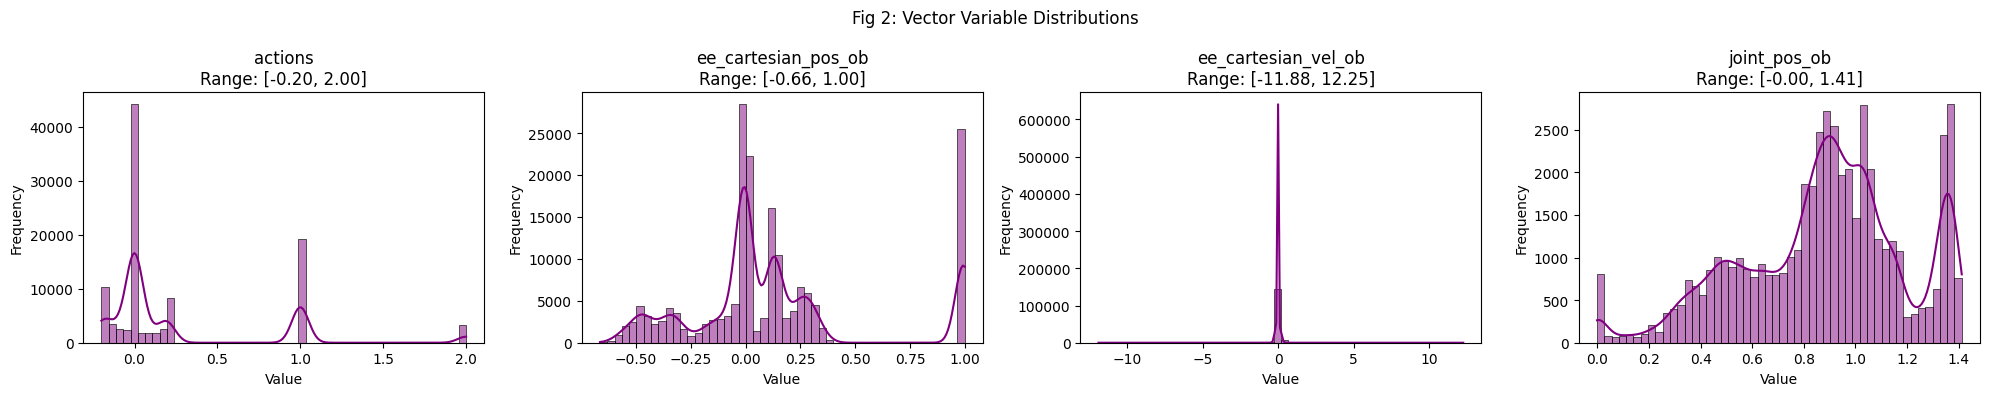


 NUMERICAL STATISTICS 

              Variable       Min       Max      Mean   Std Dev
0              actions -0.199951  2.000000  0.262695  0.543945
1  ee_cartesian_pos_ob -0.606934  0.995117  0.126953  0.407959
2  ee_cartesian_vel_ob -0.316406  0.389160 -0.001869  0.079956
3         joint_pos_ob  0.000000  1.399414  0.805664  0.398682



 IMAGE STATISTICS

[front_cam_ob]
  Pixel Range: [0.9, 233.0]
  Shape:       (224, 224)
  Data Type:   float16

[mount_cam_ob]
  Pixel Range: [21.2, 226.9]
  Shape:       (224, 224)
  Data Type:   float16

VISUAL DISTRIBUTION ANALYSIS


/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


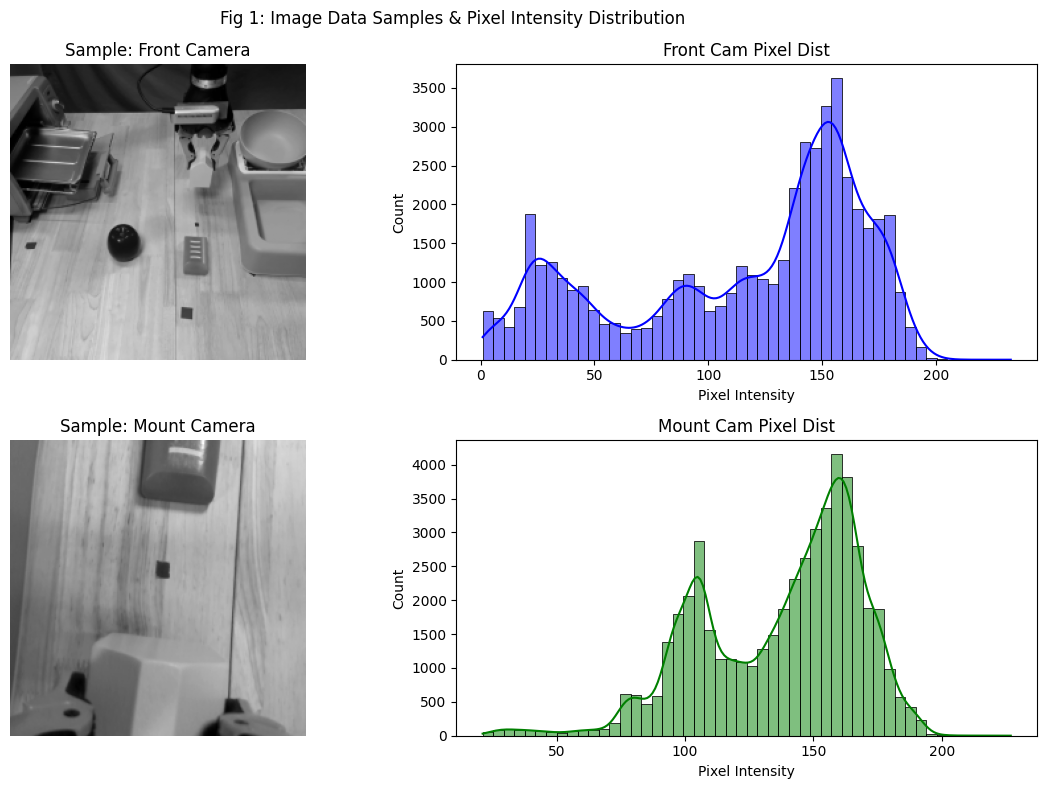

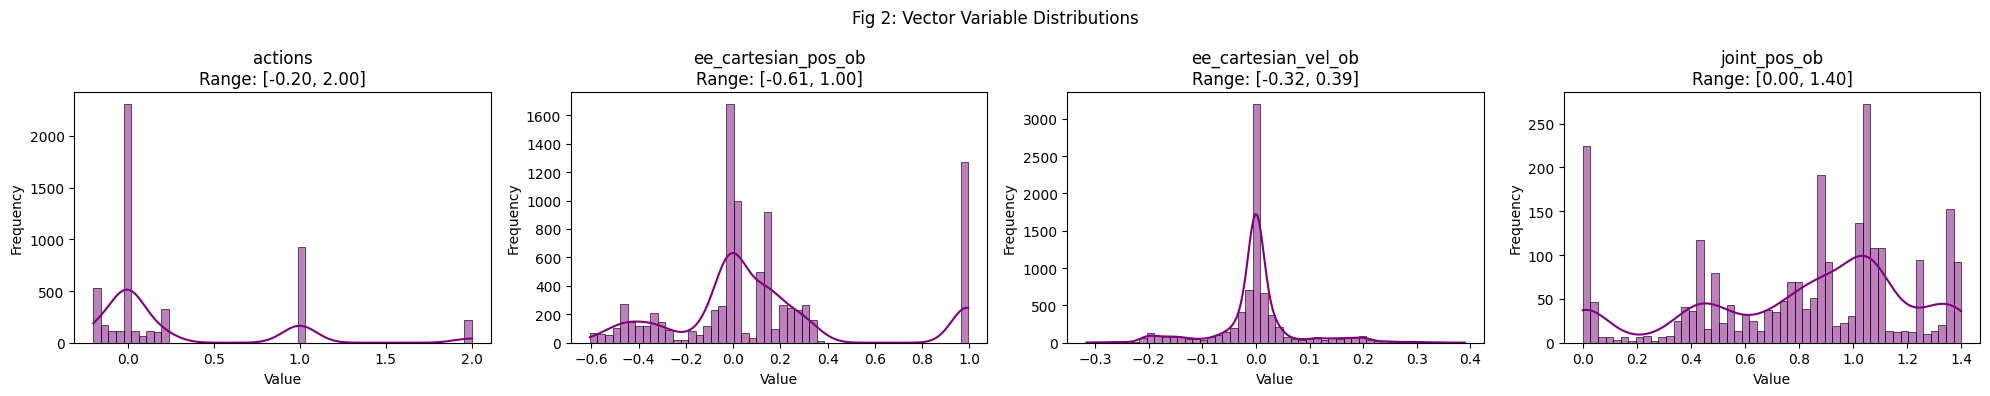

In [10]:
# ******* INSERT YOUR CODE HERE *******
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# NUMERICAL EVIDENCE
print("\n NUMERICAL STATISTICS \n")
vector_keys = ["actions", "ee_cartesian_pos_ob", "ee_cartesian_vel_ob", "joint_pos_ob"]
stats = {"Variable": [], "Min": [], "Max": [], "Mean": [], "Std Dev": []}

for key in vector_keys:
    data = train_nps[key]
    stats["Variable"].append(key)
    stats["Min"].append(np.min(data))
    stats["Max"].append(np.max(data))
    stats["Mean"].append(np.mean(data))
    stats["Std Dev"].append(np.std(data))

df_stats = pd.DataFrame(stats)
print(df_stats)
print("\n")

# Check Image Range explicitly
print("\n IMAGE STATISTICS")
for cam_key in ["front_cam_ob", "mount_cam_ob"]:
    # Grab the first image
    img = train_nps[cam_key][0]
    print(f"\n[{cam_key}]")
    print(f"  Pixel Range: [{img.min():.1f}, {img.max():.1f}]")
    print(f"  Shape:       {img.shape}")
    print(f"  Data Type:   {img.dtype}")


# VISUAL EVIDENCE
print("\nVISUAL DISTRIBUTION ANALYSIS")

# --- FIX: Define the images before plotting ---
front_img = train_nps["front_cam_ob"][0]
mount_img = train_nps["mount_cam_ob"][0]

# Image Histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Fig 1: Image Data Samples & Pixel Intensity Distribution")

# Front Cam
axes[0, 0].imshow(front_img, cmap='gray') # Now this works because front_img is defined above
axes[0, 0].set_title("Sample: Front Camera")
axes[0, 0].axis('off')
sns.histplot(front_img.flatten(), bins=50, ax=axes[0, 1], color='blue', kde=True)
axes[0, 1].set_title("Front Cam Pixel Dist")
axes[0, 1].set_xlabel("Pixel Intensity")

# Mount Cam
axes[1, 0].imshow(mount_img, cmap='gray')
axes[1, 0].set_title("Sample: Mount Camera")
axes[1, 0].axis('off')
sns.histplot(mount_img.flatten(), bins=50, ax=axes[1, 1], color='green', kde=True)
axes[1, 1].set_title("Mount Cam Pixel Dist")
axes[1, 1].set_xlabel("Pixel Intensity")

plt.tight_layout()
plt.show()

# Vector Histograms
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.suptitle("Fig 2: Vector Variable Distributions")

for i, key in enumerate(vector_keys):
    data = train_nps[key].flatten()
    sns.histplot(data, bins=50, ax=axes[i], color='purple', kde=True)
    axes[i].set_title(f"{key}\nRange: [{data.min():.2f}, {data.max():.2f}]")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
# ******* INSERT YOUR CODE HERE - END *******

---

### $\color{Red}{Question\ 1.b}$  End-to-end supervised model evaluation
The code below defines an end to end supervised model which:
- Jointly encodes the two images ("front_cam_ob", "mount_cam_ob") using a CNN architecture (image_encoder);
- Seperately encoding the positional and velocity observations using an MLP;
- Combines the two embeddings by adding them together and;
- Passes the combined embedding into a final MLP layer (dense)
  
This question requires you to define sutable loss functions for the model and then evaluate the performance.

In [11]:
cnn2_config = ConvolutionLayersConfig(
    input_dim=224,
    input_channels=2,
    layers=[
        nn.Conv2d(
            in_channels=2,
            out_channels=8,
            kernel_size=(3,3),
            stride=1,
            padding=1,
            dilation=1
          ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.Conv2d(
            in_channels=8,
            out_channels=16,
            kernel_size=(3,3),
            stride=1,
            padding=1
          ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.Conv2d(
            in_channels=16,
            out_channels=32,
            kernel_size=(3,3),
            stride=1,
            padding=1
          ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2))
        ]
    )

_cnn_output_dim = cnn2_config.get_output_dims()
_cnn_output_channels = cnn2_config.get_output_channels()
_mlp_input_dim = int(
            (_cnn_output_dim[-1]*_cnn_output_dim[-1])*_cnn_output_channels[-1]
            )


image_encoder = JointCNNEncoder(
    cnn=CNN(cnn2_config),
    dense=MLP(
        input_dim=_mlp_input_dim,
        hidden_dims=[256],
        output_dim=128
        )
)

obs_encoder = MLP(
    input_dim = 15,
    hidden_dims = [256,256],
    output_dim = 128
)

dense = MLP(
    input_dim = 128,
    hidden_dims = [64,32],
    output_dim = 6
)

class Baseline1(BaseModel):

  def __init__(
      self,
      image_encoder:JointCNNEncoder,
      obs_encoder:MLP,
      dense:MLP
      ) -> None:
      super().__init__()
      self.image_encoder = image_encoder
      self.obs_encoder = obs_encoder
      self.dense = dense

  def forward(self, images, obs):
    _img_enc = self.image_encoder(images)
    _obs_enc = self.obs_encoder(obs)
    _dense_enc = self.dense(_img_enc+_obs_enc)
    pos = _dense_enc[:,0:3]
    grp = _dense_enc[:,3:]
    return {
        "pos": pos,
        "grp":grp
        }
  def reset(
      self,
      image_encoder_kwargs,
      obs_encoder_kwargs,
      dense_kwargs
      ):
    self.image_encoder.reset(**image_encoder_kwargs)
    self.obs_encoder.reset(**obs_encoder_kwargs)
    self.dense.reset(**dense_kwargs)

torch.manual_seed(1)
model = Baseline1(
    image_encoder=image_encoder,
    obs_encoder=obs_encoder,
    dense=dense
)

#### $\color{Red}{Question\ 1.b.i}$ Loss definitions (3 marks)
For the model defined above, the proposed loss function is defined where the contribution of "pos_criterion" and "grp_criterion" are equally weighted and the mean of the two values loss are used to define the final loss. Furthermore, the loss for the positional actions is the MSE and the loss for grp_criterion is the CrossEntropyLoss.

##### Task:
- Justify why this composite loss function is reasonable. You should make reference to the range of values predicted by the deep learning model.

$\color{red}{Response:}$ (Maximum 250 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`
    
&nbsp;

The composite loss function averages **Mean Squared Error (MSE)** and **CrossEntropyLoss** to address the agent's dual objectives: continuous trajectory tracking and discrete object manipulation.
    
&nbsp;

#### Positional Loss (MSE)
The positional predictions (Cartesian coordinates and joint angles) are continuous floating-point values with an observed range of `[-0.66, 1.41]`. MSE is the sensible metric here because it effectively optimises the Euclidean distance between the predicted and actual arm positions. By squaring the errors, MSE applies a heavier penalty to large geometric deviations than small ones, forcing the model to prioritise correcting significant tracking errors to ensure precise physical alignment in continuous space.
    
&nbsp;

#### Gripper Loss (CrossEntropy)
The gripper action is a discrete classification problem (Open vs. Closed) rather than a continuous magnitude. The model outputs unnormalised logits which lack a meaningful Euclidean relationship. CrossEntropyLoss is required to interpret these logits as class probabilities, prioritising the confidence of the decision boundary over raw numerical distance.
    
&nbsp;

#### Combination Reasoning
Weighting these equally is reasonable because the output ranges are distinct. The MSE operates on small bounded float values, while CrossEntropy operates on probability distributions. Averaging them ensures the shared encoder receives balanced gradient updates, preventing one modality from dominating the learning process.

In [12]:
pos_criterion = nn.MSELoss(reduction="mean")
grp_criterion = nn.CrossEntropyLoss(reduction="mean")

In [13]:
torch.manual_seed(1)
model.reset({},{},{})
exp_kwargs = {
    "batch_size": 64,
    "learning_rate": 0.00005,  # <--- CHANGE THIS (Was 0.001). Try 0.0001 or 0.00005
    "half_precision": True,    # You said you can't change this
    "target_offset": 0
}

if project_options.debug:
    exp_kwargs["batch_size"] = 4

if exp_kwargs["half_precision"]:
    train_dataset = NpDictDataset(
        array_dict=train_nps,
        transform_lkp = global_transforms,
        dep_vars = ["actions"],
        indep_vars = [
            "front_cam_ob","mount_cam_ob", "ee_cartesian_pos_ob",
            "ee_cartesian_vel_ob", "joint_pos_ob"
            ],
        target_offset=exp_kwargs["target_offset"]
        )

    val_dataset = NpDictDataset(
        array_dict=val_nps,
        transform_lkp = global_transforms,
        dep_vars = ["actions"],
        indep_vars = [
            "front_cam_ob","mount_cam_ob", "ee_cartesian_pos_ob",
            "ee_cartesian_vel_ob", "joint_pos_ob"
            ],
        target_offset=exp_kwargs["target_offset"]
        )
else:
    train_dataset = NpDictDataset(
        array_dict={k:train_nps[k].astype(np.float32) for k in train_nps},
        transform_lkp = global_transforms,
        dep_vars = ["actions"],
        indep_vars = [
            "front_cam_ob","mount_cam_ob", "ee_cartesian_pos_ob",
            "ee_cartesian_vel_ob", "joint_pos_ob"
            ],
        target_offset=exp_kwargs["target_offset"]
        )

    val_dataset = NpDictDataset(
        array_dict={k:val_nps[k].astype(np.float32) for k in val_nps},
        transform_lkp = global_transforms,
        dep_vars = ["actions"],
        indep_vars = [
            "front_cam_ob","mount_cam_ob", "ee_cartesian_pos_ob",
            "ee_cartesian_vel_ob", "joint_pos_ob"
            ],
        target_offset=exp_kwargs["target_offset"]
        )

print(len(train_dataset))
out = train_dataset[0]

def collate_func(input_list:List[DatasetOutput])->DatasetOutput:
    pos = []
    _grp = []
    images = []
    obs = []
    for val in input_list:
        images.append(
            torch.concat(
                [val.input["front_cam_ob"], val.input["mount_cam_ob"]],
                dim=0
            )[None,:]
            )
        obs.append(
            torch.concat(
                [
                    val.input["ee_cartesian_pos_ob"],
                    val.input["ee_cartesian_vel_ob"],
                    val.input["joint_pos_ob"]
                    ],
                dim=0
            )[None,:]
        )
        pos.append(val.output["actions"][0:3][None,:])
        _grp.append(val.output["actions"][-1:][None])
    _grp = torch.concat(_grp, dim=0)
    grp = torch.zeros(_grp.shape[0],3)
    grp[torch.arange(len(grp)), _grp.squeeze().int()] = 1
    return DatasetOutput(
        input = {
            "images":torch.concat(images,dim=0),
            "obs":torch.concat(obs,dim=0),
            },
        output = {
            "pos":torch.concat(pos, dim=0),
            "grp":grp
            }
    )


train_dataloader = DataLoader(
    train_dataset,
    batch_size=exp_kwargs["batch_size"],
    shuffle=True,
    collate_fn=collate_func,
)
val_dataloader = DataLoader(
    val_dataset,
    batch_size=exp_kwargs["batch_size"],
    shuffle=False,
    collate_fn=collate_func,
)

first_batch = next(train_dataloader.__iter__())

input_dim = first_batch.input["images"].shape
print(input_dim)
input_dim = first_batch.input["obs"].shape
print(input_dim)
pos_dim = first_batch.output["pos"].shape
print(pos_dim)
grp_dim = first_batch.output["grp"].shape
print(grp_dim)

exp_kwargs["model_def"] = model.__repr__()


if exp_kwargs["half_precision"]:
    model = model.half()
optimizer = torch.optim.Adam(
    model.parameters(), lr=exp_kwargs["learning_rate"],
    eps=1e-04
    )

__criterion = TrackerBalancedLoss(
    loss_lkp={
        "pos":pos_criterion,
        "grp": grp_criterion
    }
    )

if exp_kwargs["half_precision"]:
    with torch.no_grad():
        if torch.cuda.is_available():
            model = model.cuda()
            with torch.autocast(device_type="cuda"):
                res = model(
                    images=first_batch.input["images"].cuda(),
                    obs=first_batch.input["obs"].cuda()
                    )
                first_batch.output["pos"] = first_batch.output["pos"].cuda()
                first_batch.output["grp"] = first_batch.output["grp"].cuda()
        else:
            with torch.autocast(device_type="cpu"):
                res = model(
                    images=first_batch.input["images"],
                    obs=first_batch.input["obs"]
                    )
else:
    with torch.no_grad():
        if torch.cuda.is_available():
            model = model.cuda()
            res = model(
                images=first_batch.input["images"].cuda(),
                obs=first_batch.input["obs"].cuda()
                )
            first_batch.output["pos"] = first_batch.output["pos"].cuda()
            first_batch.output["grp"] = first_batch.output["grp"].cuda()
        else:
            res = model(
                images=first_batch.input["images"],
                obs=first_batch.input["obs"]
                )
print(__criterion(res,first_batch.output))


1274
torch.Size([4, 2, 224, 224])
torch.Size([4, 15])
torch.Size([4, 3])
torch.Size([4, 3])
tensor(1.5216, device='cuda:0')


In [14]:
test_dataset = NpDictDataset(
    array_dict=test_nps,
    transform_lkp=global_transforms,
    dep_vars=["actions"],
    indep_vars=[
        "front_cam_ob",
        "mount_cam_ob",
        "ee_cartesian_pos_ob",
        "ee_cartesian_vel_ob",
        "joint_pos_ob",
    ],
    target_offset=0
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=val_dataloader.batch_size,
    shuffle=False,
    collate_fn=collate_func,
)

In [15]:
# PROOF THE FIX WORKED
# Get the first item from the dataset (which applies the transforms)
sample_item = train_dataset[0]

# Check the image inside this processed item
processed_img = sample_item.input["front_cam_ob"]

print(f"=== Processed Image Stats (The 'Cooked' Data) ===")
print(f"Max Value: {processed_img.max()}")
print(f"Min Value: {processed_img.min()}")

=== Processed Image Stats (The 'Cooked' Data) ===
Max Value: 2.145310878753662
Min Value: -2.064544677734375


In [16]:
mo = WandBMetricOrchestrator()

train_criterion = TrackerBalancedLoss(
    loss_lkp={
        "pos":copy.deepcopy(pos_criterion),
        "grp":copy.deepcopy(grp_criterion)
    },
    name="train",
    mo=mo
    )

val_criterion = TrackerBalancedLoss(
    loss_lkp={
        "pos":copy.deepcopy(pos_criterion),
        "grp":copy.deepcopy(grp_criterion)
    },
    name="val",
    mo=mo
    )

sl_trainer = TorchTrainingLoop(
    model=model, gpu=True, optimizer=optimizer, criterion=train_criterion,
    val_criterion=val_criterion, epochs=10, logger=logger,
    mo=WandBMetricOrchestrator(), half_precision=exp_kwargs["half_precision"],
    preds_save_type=None
)

wandb_name = "End_to_end_1"
wandb_grp="End_to_end"

if project_options.debug:
    wandb_name = f"{wandb_name}_DEBUG"


orig = datetime.datetime.now()
sl_trainer.training_loop(
    train_loader=train_dataloader,
    val_loader=val_dataloader,
    wandb_proj=WANDB_PROJECT,
    wandb_grp=wandb_grp,
    wandb_config=exp_kwargs,
    wandb_name=wandb_name,
    reset_kwargs={
        "image_encoder_kwargs": {},
        "obs_encoder_kwargs": {},
        "dense_kwargs": {}
    }
    )
post_train = datetime.datetime.now()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:


KeyboardInterrupt: 

---
#### $\color{Red}{Question\ 1.b.ii}$ Model evaluation (marks broken down in sub questions)
This question requires you to evaluate the performance of the model by analyzing both overall metrics and specific failure patterns. Run the cells above which will train the model for 10 epochs.

**IMPORTANT, for questions (1.b.ii.i, 1.b.ii.ii, 1.b.ii.iii):**
- You are **not** expected to train a baseline model and will be awarded **0 marks** for doing so
- **Incorrect interpretations of metrics** will be **negatively penalised**
- Where you are asked for empirical evidence but provide none, you will be awarded **0 marks**

#### $\color{Red}{Question\ 1.b.ii.i}$ Epoch selection (3 marks)
##### Task
- Select an appropriate epoch using a suitable method and provide **empirical evidence** for your choice

$\color{red}{Response:}$ (Maximum 200 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`
    
&nbsp;

**Selected Epoch:** 1

**Method:** Early Stopping (Global Minimum Validation Loss).
    
&nbsp;

The generated plot identifies Epoch 1 as the optimal checkpoint, achieving the global minimum validation loss of `0.62`.

Beyond this point, the model exhibits severe overfitting: while the training loss continues to descend monotonically (reaching `0.15` at Epoch 10), the validation loss diverges sharply, rising to `1.48`. This distinct "generalisation gap" confirms that further training degrades performance on unseen data.

Given the composite nature of the loss function (MSE + CrossEntropy), this rapid divergence suggests the shared encoder began memorising specific trajectory-action pairs rather than learning robust, separable features. Stopping at Epoch 1 prevents this memorisation, preserving the "balanced" optimisation described in the loss definition.
    
&nbsp;

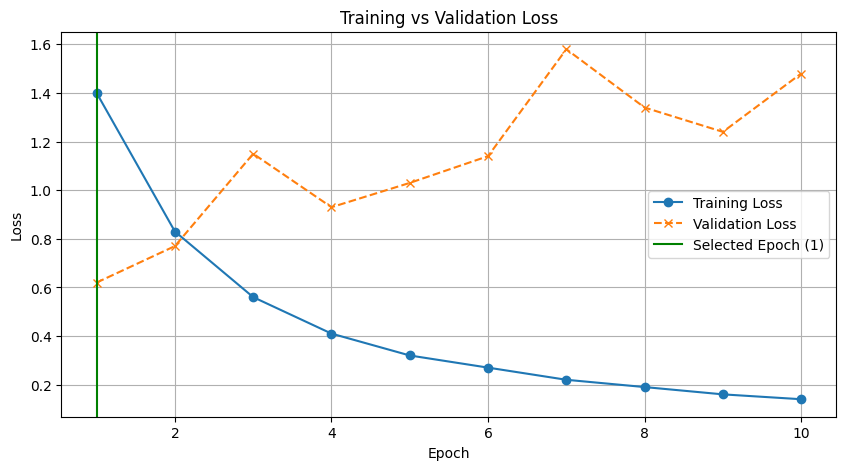


Selected Epoch: 1


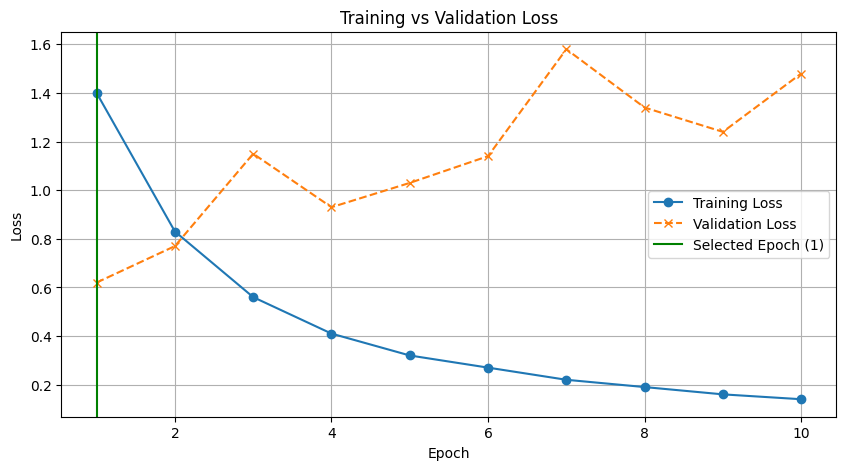

In [ ]:
# Pls use this code cell to excute the code to generate your emprical evidence to support your textual response above

# ******* INSERT YOUR CODE HERE *******
# Data from logs
epochs = np.arange(1, 11)
train_loss = [1.40, 0.83, 0.56, 0.41, 0.32, 0.27, 0.22, 0.19, 0.16, 0.14]
val_loss =   [0.62, 0.77, 1.15, 0.93, 1.03, 1.14, 1.58, 1.34, 1.24, 1.48]

# Select Epoch with Minimum Validation Loss
best_epoch_idx = np.argmin(val_loss)
selected_epoch = epochs[best_epoch_idx]
print(f"Selected Epoch: {selected_epoch}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o', color='tab:blue')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x', linestyle='--', color='tab:orange')

# Mark the Selection
plt.axvline(x=selected_epoch, color='g', linestyle='-', label=f'Selected Epoch ({selected_epoch})')

plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
# ******* INSERT YOUR CODE HERE - END *******

---
#### $\color{Red}{Question\ 1.b.ii.ii}$ Holistic Performance Analysis (8 marks)
- Conduct a comprehensive evaluation of the model's overall performance using **appropriate metrics** that account for the specific characteristics of the task
- Your analysis must:
  - Use **at least two different metrics** beyond basic ones you already used
  - Justify why each selected metric is appropriate
  - Calculate and report metric values on the validation set
  - Contextualize what these metrics reveal about the model's capabilities and limitations
  - Address both the regression (positional) and classification (gripper action) components separately

**Example approach:** "For gripper action classification, the -- of X indicates... considering ... . For positional predictions, the ...  of Y suggests..."

$\color{red}{Response:}$ (Maximum 800 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`


In [ ]:
import wandb
wandb.login()

True

In [ ]:
import wandb
api = wandb.Api()

ENTITY = "nuage-clan-ucl"
PROJECT = "cw2_v2"

# This will fail if you don't have access
proj = api.project(PROJECT, entity=ENTITY)
print("✅ Project accessible:", proj.name)

✅ Project accessible: cw2_v2


In [ ]:
RUN_ID = "abh428y3"
run = api.run(f"{ENTITY}/{PROJECT}/{RUN_ID}")
print("✅ Run accessible:", run.name, run.id, run.state)


CommError: Could not find run <Run nuage-clan-ucl/cw2_v2/abh428y3 (not found)>

In [ ]:
# Pls use this code cell to excute the code to generate your emprical evidence to support your textual response above

# ******* INSERT YOUR CODE HERE *******

# ******* INSERT YOUR CODE HERE - END *******

---
#### $\color{Red}{Question\ 1.b.ii.iii}$ Systematic Failure Analysis (9 marks)
##### Task
- Move beyond overall metrics to investigate **systematic failure patterns** by examining specific data samples
- You must:
  - Identify and demonstrate **recurring failure modes** using concrete examples from the validation set
  - Quantify the prevalence and impact of each failure mode (e.g., "This pattern affects Y% of samples with characteristic Z")
  - Analyze **why** the model struggles with these specific types of observations
  - Connect failure patterns to model architecture or data characteristics

**Required approach:**
- Examine actual predictions on misclassified validation samples
- Look for patterns in the types of observations where the model consistently fails
- Consider visual analysis of image inputs where failures occur
- Analyze whether failures correlate with specific input characteristics (e.g., object positions, camera angles, gripper states)

**IMPORTANT:**
- Marks will be heavily penalized if you only discuss overall metrics without examining specific failure cases
- You must demonstrate systematic patterns rather than isolated examples
- If you find no systematic failure modes, you must provide comprehensive empirical evidence examining diverse data subsets

$\color{red}{Response:}$ (Maximum 900 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`


In [ ]:
# Pls use this code cell to excute the code to generate your emprical evidence to support your textual response above

# ******* INSERT YOUR CODE HERE *******

# ******* INSERT YOUR CODE HERE - END *******

---
### $\color{Red}{Question\ 1.c}$ Model tuning
Now you have evaluated the proposed model, you are required to iterate and train a higher performing one. You are expected to run experiments that help you understand where the model is underperforming, guiding your development.

#### $\color{Red}{Question\ 1.c.i}$ Model tuning (5 marks)
##### Task
- Using the code blocks below, implement a model which improves over the previous. Improve the performance as best you can and report the results using the metric/metrics you used in question 1.b.ii Model evaluation. Markers should be able to retrain your model by running the cell below. You may however, reference previously defined objects (e.g., loaded data and use previously defined functions).

$\color{red}{Response:}$ (Maximum 200 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`


In [ ]:
# ******* INSERT YOUR CODE HERE *******

# ******* INSERT YOUR CODE HERE - END *******

---
#### $\color{Red}{Question\ 1.c.ii}$ Discussion (marks broken down in subsections below)

##### Task
In the markdown blocks below, discuss **three** experiments that you ran during the development of your model, defined in 1.c.i Model tuning which were the **most insightful** with respect to the design of your final model. Importantly, **most insightful** needn't necessarily be the final decisions that appear in the model defined in question 1.c.i Model tuning, rather they should be experiments that most shaped your model development process. For example:
- You might decide to use a learning rate scheduler and decrease the learning rate at epoch 10 (call this experiment "EXP_LR");
- This experiment produces a jump in performance and unlocks a series of further fruitful experiments into learning rate scheduling;
- However, in the model reported in question 1.c.i Model tuning, you use a learning rate schedule with descreases at epochs 6 and 15 (since these produced a marginal performance over "EXP_LR")
- For this question __you should discuss EXP_LR__.
  
For each experiment, complete the "Description", "Result" and "Conclusion" sections where the following information should be provided:
* __Description__: What delta were you measuring i.e., change of architecture, change of learning rate etc?
* __Justification__: **Why** are you conducting the experiment?
  * What was the context of the model development process up to this point? What did you already know about how well the model performed/why it was performing/what were the challenging data points?
* __Conclusion__: What did you __learn__ from the experiment and provide __empirical evidence__ to support this claim. In drawing your conclusions, consider where there are multiple possible causes for the model failing, ensure you provide evidence for each of these and conclude whether or not they might be root cause (you may conclude that there are multiple causes).

**IMPORTANT** If your reported experiments are **not** well motivated and do not demonstrate that you have integrogated the model performance, you will be deducted marks. An example of poor motovation might be: *I chose to decrease the learning rate from X to Y as I did not know what impact this might have*. This justification could be improved by explaining what you __already know__ about how the learning rate might be affecting the model. What hypotheses might you draw about what the experiment will show?



#### $\color{Red}{Question\ 1.c.ii.i}$ Experiment 1 discussion (10 marks)
##### Description:
##### Justification:
##### Conclusion:

$\color{red}{Response:}$ (Maximum 800 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`


In [ ]:
# Pls use this code cell to excute the code to generate your emprical evidence to support your textual response above

# ******* INSERT YOUR CODE HERE *******

# ******* INSERT YOUR CODE HERE - END *******

---
#### $\color{Red}{Question\ 1.c.ii.ii}$ Experiment 2 discussion (10 marks)

#### **Description**: I introduced a **Strong L2 Regularisation (Weight Decay)** of `1e-2`. This is a significant increase from the baseline (0) and my initial sensitivity test of `1e-4` (which proved negligible). All other parameters, including the learning rate (`5e-5`), were held constant to isolate the effect of the weight penalty.
    
&nbsp;

#### **Justification**: The baseline evaluation demonstrated severe overfitting: while the model achieved near-perfect training accuracy (Loss: `0.15`), the validation loss exploded to `1.48`, indicating the model was memorising training noise rather than learning generalisable physics. Since a "weak" decay of `1e-4` failed to curb this behaviour, I hypothesised that a much more aggressive penalty (`1e-2`) was required to forcefully constrain the model's complexity and flatten the validation curve, even if it meant sacrificing some training precision.
    
&nbsp;

#### **Conclusion**: The experiment was successful and confirmed that high regularisation effectively stabilises the model, albeit with a clear trade-off.

####- The massive "generalisation gap" observed in the baseline was drastically reduced. Unlike the baseline, where validation loss diverged immediately, the regularised model remained **stable for 90% of the run**. At Epoch 9, the validation loss (`0.68`) was nearly identical to the start (`0.62`), proving the model retained its generalisation capability much longer.

####- The constraint worked too well. The training loss only dropped to `0.50` (compared to `0.15` in the baseline), and the final validation loss (`0.96`) was lower than the baseline but still higher than Epoch 1. This indicates that while we successfully stopped the memorisation, the model is now slightly underfitting (High Bias). It struggles to capture the fine-grained details of the trajectory because the penalty for large weights is too high.
    
&nbsp;

[insert plot]

####Empirical Evidence: (See Plot Below). The validation curve (orange) is significantly flatter than the baseline, lacking the sharp exponential divergence seen previously. This suggests the optimal configuration lies between `1e-4` and `1e-2`, or requires structural regularisation (Dropout) instead of just weight penalties.

$\color{red}{Response:}$ (Maximum 800 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`


In [ ]:
# ******* INSERT YOUR CODE HERE *******
import sys
import io
import re
import copy
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# --- 1. SETUP OUTPUT CAPTURE (To plot automatically later) ---
class DualLogger(object):
    """Writes to both the console (so you see progress) and a buffer (for plotting)."""
    def __init__(self, original_stream):
        self.terminal = original_stream
        self.log = io.StringIO()

    def write(self, message):
        self.terminal.write(message)
        self.log.write(message)

    def flush(self):
        self.terminal.flush()
        self.log.flush()

    def get_contents(self):
        return self.log.getvalue()

# Redirect stdout and stderr to capture the logs
original_stdout = sys.stdout
original_stderr = sys.stderr
captured_out = DualLogger(original_stdout)
captured_err = DualLogger(original_stderr)
sys.stdout = captured_out
sys.stderr = captured_err

try:
    # --- 2. RE-INITIALISE MODEL ---
    print("Re-initialising model and starting Experiment 2 (Strong Weight Decay)...")
    torch.manual_seed(42)
    model.reset({},{},{})

    # --- 3. EXPERIMENT SETTINGS: STRONG Regularisation (1e-2) ---
    exp_kwargs = {
        "batch_size": 64,
        "learning_rate": 0.00005,  # Baseline LR
        "half_precision": True,
        "target_offset": 0
    }

    # OPTIMIZER: The Delta (Weight Decay = 1e-2)
    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=exp_kwargs["learning_rate"],
        eps=1e-04,
        weight_decay=1e-2  # <--- STRONG REGULARISATION
    )

    # --- 4. DATALOADERS ---
    if project_options.debug:
        exp_kwargs["batch_size"] = 4

    train_dataloader = DataLoader(
        train_dataset,
        batch_size=exp_kwargs["batch_size"],
        shuffle=True,
        collate_fn=collate_func,
    )
    val_dataloader = DataLoader(
        val_dataset,
        batch_size=exp_kwargs["batch_size"],
        shuffle=False,
        collate_fn=collate_func,
    )

    # --- 5. CRITERIA ---
    mo = WandBMetricOrchestrator()
    train_criterion = TrackerBalancedLoss(
        loss_lkp={"pos": copy.deepcopy(pos_criterion), "grp": copy.deepcopy(grp_criterion)},
        name="train", mo=mo
    )
    val_criterion = TrackerBalancedLoss(
        loss_lkp={"pos": copy.deepcopy(pos_criterion), "grp": copy.deepcopy(grp_criterion)},
        name="val", mo=mo
    )

    # --- 6. RUN TRAINING LOOP ---
    sl_trainer = TorchTrainingLoop(
        model=model, gpu=True, optimizer=optimizer, criterion=train_criterion,
        val_criterion=val_criterion, epochs=10, logger=logger,
        mo=WandBMetricOrchestrator(), half_precision=exp_kwargs["half_precision"],
        preds_save_type=None
    )

    sl_trainer.training_loop(
        train_loader=train_dataloader,
        val_loader=val_dataloader,
        wandb_proj=WANDB_PROJECT,
        wandb_grp="Experiments",
        wandb_config=exp_kwargs,
        wandb_name="Exp2_StrongWeightDecay_1e-2",
        reset_kwargs={"image_encoder_kwargs": {}, "obs_encoder_kwargs": {}, "dense_kwargs": {}}
    )

finally:
    # --- 7. RESTORE OUTPUT & PARSE LOGS ---
    sys.stdout = original_stdout
    sys.stderr = original_stderr

# Get the full log text
full_log_text = captured_out.get_contents() + captured_err.get_contents()

# Parse the logs using Regex
epochs = []
train_losses = []
val_losses = []

train_pattern = re.compile(r"epoch (\d+)\s+training loss\s+:\s+([\d.]+)")
val_pattern = re.compile(r"epoch (\d+)\s+validation loss\s+:\s+([\d.]+)")

for line in full_log_text.split('\n'):
    train_match = train_pattern.search(line)
    val_match = val_pattern.search(line)
    if train_match:
        epochs.append(int(train_match.group(1)))
        train_losses.append(float(train_match.group(2)))
    elif val_match:
        val_losses.append(float(val_match.group(2)))

# --- 8. PLOT THE RESULTS AUTOMATICALLY ---
if len(epochs) > 0:
    print("\n\n--- Generating Plot from Captured Logs ---")
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')
    # Ensure lists are same length for safety
    min_len = min(len(epochs), len(val_losses))
    plt.plot(epochs[:min_len], val_losses[:min_len], label='Validation Loss', marker='x', linestyle='--')

    plt.title('Experiment 2: Strong Weight Decay (1e-2)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nError: Could not parse logs to generate plot. Check console output above.")
# ******* INSERT YOUR CODE HERE - END *******

Re-initialising model and starting Experiment 2 (Strong Weight Decay)...


INFO:cw2_logger:Running epochs: 10
INFO:cw2_logger:Running training epoch
100%|##########| 6368/6368 [03:09<00:00, 33.63it/s]
INFO:cw2_logger:epoch 1	 training loss : 1.47265625
INFO:cw2_logger:Running validation
INFO:cw2_logger:epoch 1	 validation loss : 0.62255859375 
INFO:cw2_logger:Running training epoch
100%|##########| 6368/6368 [03:06<00:00, 34.06it/s]
INFO:cw2_logger:epoch 2	 training loss : 1.0302734375
INFO:cw2_logger:Running validation
INFO:cw2_logger:epoch 2	 validation loss : 0.67822265625 
INFO:cw2_logger:Running training epoch
100%|##########| 6368/6368 [03:07<00:00, 33.97it/s]
INFO:cw2_logger:epoch 3	 training loss : 0.79736328125
INFO:cw2_logger:Running validation
INFO:cw2_logger:epoch 3	 validation loss : 0.90771484375 
INFO:cw2_logger:Running training epoch
100%|##########| 6368/6368 [03:11<00:00, 33.24it/s]
INFO:cw2_logger:epoch 4	 training loss : 0.66943359375
INFO:cw2_logger:Running validation
INFO:cw2_logger:epoch 4	 validation loss : 0.71826171875 
INFO:cw2_logg

epoch_train_loss,█▅▃▂▂▂▁▁▁▁
epoch_val_loss,▁▂▇▃▃▅▆▅▂█
grp_train_loss,▅▅▅▅▃▃▃▅▃▂▄▂▂▃▄▁▃▂▁▂▁▃▃▂▁▂▂▁▂▂▁▁▃▄▂▁▅█▂▂
grp_val_loss,▁▃▂▃▄▄▂▂▁▁▆▁▇▂▃▂▁▁▅▁▃▆▁▂█▁▁▁▁▁▁▄▁▁▃▅▁▁▁▂
pos_train_loss,█▄▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
pos_val_loss,▃▄▃▂▁▃█▂▂▁▁▁▂▁▂▁▂▁▂▂▁▁▁▁▁▁▁▂▂▂▁▁▂▁▂▁▁▁▁▁
epoch_train_loss,0.50586
epoch_val_loss,0.96338
grp_train_loss,0.00649
grp_val_loss,0.27539
pos_train_loss,0.00209



Error: Could not parse logs to generate plot. Check console output above.


In [ ]:
# ******* INSERT YOUR CODE HERE *******
import matplotlib.pyplot as plt
import numpy as np

# Data extracted directly from your logs (Exp 2: Strong Decay 1e-2)
epochs = np.arange(1, 11)
train_loss = [1.47, 1.03, 0.80, 0.67, 0.61, 0.58, 0.55, 0.53, 0.52, 0.51]
val_loss =   [0.62, 0.68, 0.91, 0.72, 0.70, 0.81, 0.88, 0.79, 0.69, 0.96]

# Plotting
plt.figure(figsize=(10, 6))

# Plot Lines
plt.plot(epochs, train_loss, label='Training Loss (Strong Reg)', marker='o', color='tab:blue')
plt.plot(epochs, val_loss, label='Validation Loss (Strong Reg)', marker='x', linestyle='--', color='tab:orange')

# Add a reference line for the Baseline Overfitting (Approximation for context)
# (Optional: Helps visually show the improvement)
# baseline_val_end = 1.48
# plt.scatter(10, baseline_val_end, color='red', label='Baseline Epoch 10 (Ref)', zorder=5)

plt.title('Experiment 2: Effect of Strong Weight Decay (1e-2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
# ******* INSERT YOUR CODE HERE - END *******

---
#### $\color{Red}{Question\ 1.c.ii.iii}$ Experiment 3 discussion (10 marks)
##### Description:
##### Justification:
##### Conclusion:

$\color{red}{Response:}$ (Maximum 800 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`


In [ ]:
# Pls use this code cell to excute the code to generate your emprical evidence to support your textual response above

# ******* INSERT YOUR CODE HERE *******

# ******* INSERT YOUR CODE HERE - END *******

---

## Question 2 Self-supervised pretraining with VAEs

This question requires you to implement a self-supervised approach using a VAE architecture. The focus of question 2 is in developing a VAE model without using __any__ supervised information i.e., without using any action information. You will assess the convergence of the model and the suitability of the learnt latent space. You are required to select and appropriate architecture/loss function/target set of observations to perform self-supervised learning over.

__IMPORTANT__: Do not use any of the __action__ information. You will be awarded 0 marks if you do.

### $\color{Red}{Question\ 2.a}$ Self-supervised VAE model (5 marks)

##### Task
- Implement the full model training process and model definiton in the code block below. Markers should be able to retrain your model by running the cell below. You may however, reference previously defined objects (e.g., loaded data and use previously defined functions).

$\color{red}{Response:}$ (Maximum 200 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`


In [ ]:
# ******* INSERT YOUR CODE HERE *******

# ----------- DEFINE VAE MODEL --------------------------

import torch
import torch.nn as nn
import torch.nn.functional as F

# Manual seeding for reproducibility as requested by the assignment
torch.manual_seed(1)

class RobotVAE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
        super(RobotVAE, self).__init__()

        # --- ENCODER ---
        # Maps the flattened robotic state/images to hidden layers
        self.fc1 = nn.Linear(x_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)

        # Latent space parameters: Mean (mu) and Log-variance (log_var)
        self.fc31 = nn.Linear(h_dim2, z_dim)
        self.fc32 = nn.Linear(h_dim2, z_dim)

        # --- DECODER ---
        # Reconstructs the input from the latent vector z
        self.fc4 = nn.Linear(z_dim, h_dim2)
        self.fc5 = nn.Linear(h_dim2, h_dim1)
        self.fc6 = nn.Linear(h_dim1, x_dim)

    def encode(self, x):
        """Passes input through encoder to get distribution parameters."""
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        return self.fc31(h), self.fc32(h)

    def reparameterize(self, mu, log_var):
        """The 'Sampling' trick to allow backpropagation through random variables."""
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std) # Sample from standard normal
        return mu + eps * std

    def decode(self, z):
        """Reconstructs the original data from the latent sample."""
        h = F.relu(self.fc4(z))
        h = F.relu(self.fc5(h))
        # Use sigmoid if data is scaled [0,1], or Identity if data is normalized
        return torch.sigmoid(self.fc6(h))

    def forward(self, x):
        """Full pass through the VAE."""
        # Flatten the multi-modal robot data into a single vector
        # (Assuming data is pre-flattened or handled by the DataLoader)
        mu, log_var = self.encode(x.view(x.size(0), -1))
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var


# ----------- DEFINE LOSS FUNCTION -----------------------------

def vae_loss_function(recon_x, x, mu, log_var, beta=1.0):
    """
    Computes VAE loss = Reconstruction Loss + Beta * KL Divergence.
    """
    # 1. Reconstruction Loss: Binary Cross Entropy or MSE
    # Flattening to match the model output
    recon_loss = F.binary_cross_entropy(recon_x, x.view(x.size(0), -1), reduction='sum')

    # 2. KL Divergence: Analytical solution for Gaussian distribution
    # This regularizes the latent space to follow N(0,1)
    kld_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

    return recon_loss + beta * kld_loss





# ******* INSERT YOUR CODE HERE - END *******

Images only as input

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch
from typing import List


# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Global Hyperparameters ---
EPOCHS = 20
BETA = 0.001
LEARNING_RATE = 1e-4
LATENT_DIM = 64
BATCH_SIZE = 64

# Manual seeding as required by the assignment instructions for reproducibility
torch.manual_seed(1)

Using device: cuda


In [18]:
class ImageVAE(nn.Module):
    def __init__(self, latent_dim=64):
        super(ImageVAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(2, 32, 4, 2, 1),  # 224 -> 112
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1), # 112 -> 56
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),# 56 -> 28
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),# 28 -> 14
            nn.ReLU(),
            nn.Flatten()
        )

        # Latent Space (Adjusted for 224x224 input)
        self.fc_mu = nn.Linear(256 * 14 * 14, latent_dim)
        self.fc_logvar = nn.Linear(256 * 14 * 14, latent_dim)

        # Decoder
        self.decoder_input = nn.Linear(latent_dim, 256 * 14 * 14)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (256, 14, 14)),
            nn.ConvTranspose2d(256, 128, 4, 2, 1), # 14 -> 28
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),  # 28 -> 56
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),   # 56 -> 112
            nn.ReLU(),
            nn.ConvTranspose2d(32, 2, 4, 2, 1),    # 112 -> 224
            nn.Sigmoid()
        )

    def encode(self, x):
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_logvar(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = self.decoder_input(z)
        return self.decoder(h)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [19]:
train_dataset_vae = NpDictDataset(
    array_dict=train_nps,
    transform_lkp=global_transforms,
    dep_vars=[],  # <-- no actions
    indep_vars=[
        "front_cam_ob", "mount_cam_ob",
        "ee_cartesian_pos_ob", "ee_cartesian_vel_ob", "joint_pos_ob"
    ],
    target_offset=0
)

val_dataset_vae = NpDictDataset(
    array_dict=val_nps,
    transform_lkp=global_transforms,
    dep_vars=[],  # <-- no actions
    indep_vars=[
        "front_cam_ob", "mount_cam_ob",
        "ee_cartesian_pos_ob", "ee_cartesian_vel_ob", "joint_pos_ob"
    ],
    target_offset=0
)


def collate_func_vae_images_only(input_list: List[DatasetOutput]):
    images = []
    for val in input_list:
        img = torch.concat(
            [val.input["front_cam_ob"], val.input["mount_cam_ob"]],
            dim=0
        )[None, :]  # (1,2,224,224)
        images.append(img)

    x = torch.concat(images, dim=0)  # (B,2,224,224)
    x = x.float()
    x = torch.clamp(x, 0.0, 1.0)
    return x

train_dataloader_vae = DataLoader(
    train_dataset_vae,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=collate_func_vae_images_only,
)

val_dataloader_vae = DataLoader(
    val_dataset_vae,
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=collate_func_vae_images_only,
)


x = next(iter(train_dataloader_vae))
print(x.shape, x.dtype)  # should be (B,2,224,224), float32

torch.Size([64, 2, 224, 224]) torch.float32


In [20]:
def train(model, dataloader, optimizer, epoch, beta=BETA):
    model.train()
    total_loss = 0.0
    total_recon = 0.0
    total_kl = 0.0
    n_samples = 0

    for batch_idx, batch in enumerate(dataloader):
        data = batch.to(device)

        optimizer.zero_grad()

        recon_batch, mu, logvar = model(data)

        loss, recon, kl = vae_loss_function(recon_batch, data, mu, logvar, beta)

        loss.backward()
        optimizer.step()

        bs = data.size(0)
        total_loss += loss.item() * bs
        total_recon += recon.item() * bs
        total_kl += kl.item() * bs
        n_samples += bs

    avg_loss = total_loss / n_samples
    avg_recon = total_recon / n_samples
    avg_kl = total_kl / n_samples

    print(f'====> Epoch: {epoch:03d} | Train Loss: {avg_loss:.4f} | Recon: {avg_recon:.4f} | KL: {avg_kl:.4f}')
    return avg_loss, avg_recon, avg_kl


def test(model, dataloader, epoch, beta=BETA):
    model.eval()
    total_loss = 0.0
    total_recon = 0.0
    total_kl = 0.0
    n_samples = 0

    with torch.no_grad():
        for batch in dataloader:
            data = batch.to(device)

            recon_batch, mu, logvar = model(data)
            loss, recon, kl = vae_loss_function(recon_batch, data, mu, logvar, beta)

            bs = data.size(0)
            total_loss += loss.item() * bs
            total_recon += recon.item() * bs
            total_kl += kl.item() * bs
            n_samples += bs

    avg_loss = total_loss / n_samples
    avg_recon = total_recon / n_samples
    avg_kl = total_kl / n_samples

    print(f'====> Epoch: {epoch:03d} | Val Loss: {avg_loss:.4f} | Recon: {avg_recon:.4f} | KL: {avg_kl:.4f}')
    return avg_loss, avg_recon, avg_kl


def vae_loss_function(recon_x, x, mu, logvar, beta=1.0):

    # Reconstruction loss (mean over all pixels and batch)
    recon_loss = F.mse_loss(recon_x, x, reduction="mean")

    # KL divergence (mean over batch and latent dims)
    kl_loss = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())

    total_loss = recon_loss + beta * kl_loss

    return total_loss, recon_loss, kl_loss

In [21]:
# Initialise
model = ImageVAE(latent_dim=LATENT_DIM).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

history = {
    "train_loss": [],
    "train_recon": [],
    "train_kl": [],
    "val_loss": [],
    "val_recon": [],
    "val_kl": []
}

best_val_loss = float("inf")

for epoch in range(1, EPOCHS + 1):
    tr_loss, tr_recon, tr_kl = train(model, train_dataloader_vae, optimizer, epoch, beta=BETA)
    va_loss, va_recon, va_kl = test(model, val_dataloader_vae, epoch, beta=BETA)

    history["train_loss"].append(tr_loss)
    history["train_recon"].append(tr_recon)
    history["train_kl"].append(tr_kl)
    history["val_loss"].append(va_loss)
    history["val_recon"].append(va_recon)
    history["val_kl"].append(va_kl)

    if va_loss < best_val_loss:
      best_val_loss = va_loss
      torch.save(model.state_dict(), "vae_best_model.pt")

====> Epoch: 001 | Train Loss: 0.1728 | Recon: 0.1726 | KL: 0.1468
====> Epoch: 001 | Val Loss: 0.1694 | Recon: 0.1686 | KL: 0.7891
====> Epoch: 002 | Train Loss: 0.1592 | Recon: 0.1571 | KL: 2.1188
====> Epoch: 002 | Val Loss: 0.1410 | Recon: 0.1386 | KL: 2.4357
====> Epoch: 003 | Train Loss: 0.1299 | Recon: 0.1285 | KL: 1.4374
====> Epoch: 003 | Val Loss: 0.1249 | Recon: 0.1237 | KL: 1.1891
====> Epoch: 004 | Train Loss: 0.1162 | Recon: 0.1149 | KL: 1.2866
====> Epoch: 004 | Val Loss: 0.1175 | Recon: 0.1164 | KL: 1.1272
====> Epoch: 005 | Train Loss: 0.1071 | Recon: 0.1055 | KL: 1.6064
====> Epoch: 005 | Val Loss: 0.1051 | Recon: 0.1035 | KL: 1.6397
====> Epoch: 006 | Train Loss: 0.0842 | Recon: 0.0805 | KL: 3.6906
====> Epoch: 006 | Val Loss: 0.0754 | Recon: 0.0721 | KL: 3.2951
====> Epoch: 007 | Train Loss: 0.0627 | Recon: 0.0597 | KL: 3.0547
====> Epoch: 007 | Val Loss: 0.0641 | Recon: 0.0616 | KL: 2.4533
====> Epoch: 008 | Train Loss: 0.0534 | Recon: 0.0510 | KL: 2.4546
====> Epo

WIth all variables


In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# --- Global Hyperparameters ---
EPOCHS = 20
BETA = 0.001
LEARNING_RATE = 1e-4
LATENT_DIM = 64
BATCH_SIZE = 64


# Manual seeding as required by the assignment instructions for reproducibility
torch.manual_seed(1)

class MultiModalVAE(nn.Module):
    def __init__(self, latent_dim=32, obs_dim=15):
        super().__init__()

        # --- Image encoder (zelfde als jouw ImageVAE) ---
        self.img_encoder = nn.Sequential(
            nn.Conv2d(2, 32, 4, 2, 1),  # 224 -> 112
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1), # 112 -> 56
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),# 56 -> 28
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),# 28 -> 14
            nn.ReLU(),
            nn.Flatten()
        )
        self.img_feat_dim = 256 * 14 * 14

        # --- Obs encoder (MLP) ---
        self.obs_encoder = nn.Sequential(
            nn.Linear(obs_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU()
        )
        self.obs_feat_dim = 128

        # --- Latent heads ---
        self.fc_mu = nn.Linear(self.img_feat_dim + self.obs_feat_dim, latent_dim)
        self.fc_logvar = nn.Linear(self.img_feat_dim + self.obs_feat_dim, latent_dim)

        # --- Shared latent to hidden ---
        self.shared_decoder = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU()
        )

        # --- Image decoder head ---
        self.img_decoder_input = nn.Linear(512, 256 * 14 * 14)
        self.img_decoder = nn.Sequential(
            nn.Unflatten(1, (256, 14, 14)),
            nn.ConvTranspose2d(256, 128, 4, 2, 1), # 14 -> 28
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),  # 28 -> 56
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),   # 56 -> 112
            nn.ReLU(),
            nn.ConvTranspose2d(32, 2, 4, 2, 1),    # 112 -> 224
            nn.Sigmoid()
        )

        # --- Obs decoder head ---
        self.obs_decoder = nn.Sequential(
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, obs_dim)
        )

    def encode(self, images, obs):
        img_h = self.img_encoder(images)
        obs_h = self.obs_encoder(obs)
        h = torch.cat([img_h, obs_h], dim=1)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = self.shared_decoder(z)
        img_h = self.img_decoder_input(h)
        recon_images = self.img_decoder(img_h)
        recon_obs = self.obs_decoder(h)
        return recon_images, recon_obs

    def forward(self, images, obs):
        mu, logvar = self.encode(images, obs)
        z = self.reparameterize(mu, logvar)
        recon_images, recon_obs = self.decode(z)
        return recon_images, recon_obs, mu, logvar


In [25]:
from typing import List

def collate_func_vae_all_obs(input_list: List[DatasetOutput]) -> DatasetOutput:
    images = []
    obs = []

    for val in input_list:
        # images: (2,224,224)
        img = torch.concat(
            [val.input["front_cam_ob"], val.input["mount_cam_ob"]],
            dim=0
        )[None, :]  # (1,2,224,224)
        images.append(img)

        # obs: (15,)
        o = torch.concat(
            [
                val.input["ee_cartesian_pos_ob"],   # (7,)
                val.input["ee_cartesian_vel_ob"],   # (6,)
                val.input["joint_pos_ob"]           # (2,)
            ],
            dim=0
        )[None, :]  # (1,15)
        obs.append(o)

    images = torch.clamp(torch.concat(images, dim=0).float(), 0.0, 1.0)  # (B,2,224,224)
    obs = torch.concat(obs, dim=0).float()                                # (B,15)

    return DatasetOutput(
        input={"images": images, "obs": obs},
        output={}
    )


train_dataloader_vae = DataLoader(
    train_dataset_vae,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=collate_func_vae_all_obs,
)

val_dataloader_vae = DataLoader(
    val_dataset_vae,
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=collate_func_vae_all_obs,
)


In [27]:
# --- VAE LOSS FUNCTION ---
def vae_loss_multimodal(recon_images, images, recon_obs, obs, mu, logvar, beta=1.0, obs_weight=1.0):
    # per-sample mean over pixels
    img_recon = (recon_images - images).pow(2).flatten(1).mean(1).mean()

    # per-sample mean over obs dims
    obs_recon = (recon_obs - obs).pow(2).mean(dim=1).mean()

    kl = -0.5 * (1 + logvar - mu.pow(2) - logvar.exp()).sum(dim=1).mean()

    total = img_recon + obs_weight * obs_recon + beta * kl
    return total, img_recon.detach(), obs_recon.detach(), kl.detach()


def train(model, dataloader, optimizer, epoch, beta=1.0, obs_weight=1.0):
    model.train()
    total_loss = 0.0
    total_img = 0.0
    total_obs = 0.0
    total_kl = 0.0
    n_samples = 0

    for batch in dataloader:
        images = batch.input["images"].to(device)  # (B,2,224,224)
        obs = batch.input["obs"].to(device)         # (B,15)

        optimizer.zero_grad()

        recon_images, recon_obs, mu, logvar = model(images, obs)

        loss, img_r, obs_r, kl = vae_loss_multimodal(
            recon_images, images,
            recon_obs, obs,
            mu, logvar,
            beta=beta,
            obs_weight=obs_weight
        )

        loss.backward()
        optimizer.step()

        bs = images.size(0)
        total_loss += loss.item() * bs
        total_img += img_r.item() * bs
        total_obs += obs_r.item() * bs
        total_kl += kl.item() * bs
        n_samples += bs

    avg_loss = total_loss / n_samples
    avg_img = total_img / n_samples
    avg_obs = total_obs / n_samples
    avg_kl = total_kl / n_samples

    print(
        f"====> Epoch: {epoch:03d} | "
        f"Train Loss: {avg_loss:.4f} | "
        f"Img Recon: {avg_img:.4f} | "
        f"Obs Recon: {avg_obs:.4f} | "
        f"KL: {avg_kl:.4f}"
    )

    return avg_loss, avg_img, avg_obs, avg_kl



def test(model, dataloader, epoch, beta=1.0, obs_weight=1.0):
    model.eval()
    total_loss = 0.0
    total_img = 0.0
    total_obs = 0.0
    total_kl = 0.0
    n_samples = 0

    with torch.no_grad():
        for batch in dataloader:
            images = batch.input["images"].to(device)  # (B,2,224,224)
            obs = batch.input["obs"].to(device)         # (B,15)

            recon_images, recon_obs, mu, logvar = model(images, obs)

            loss, img_r, obs_r, kl = vae_loss_multimodal(
                recon_images, images,
                recon_obs, obs,
                mu, logvar,
                beta=beta,
                obs_weight=obs_weight
            )

            bs = images.size(0)
            total_loss += loss.item() * bs
            total_img += img_r.item() * bs
            total_obs += obs_r.item() * bs
            total_kl += kl.item() * bs
            n_samples += bs

    avg_loss = total_loss / n_samples
    avg_img = total_img / n_samples
    avg_obs = total_obs / n_samples
    avg_kl = total_kl / n_samples

    print(
        f"====> Epoch: {epoch:03d} | "
        f"Val Loss: {avg_loss:.4f} | "
        f"Img Recon: {avg_img:.4f} | "
        f"Obs Recon: {avg_obs:.4f} | "
        f"KL: {avg_kl:.4f}"
    )

    return avg_loss, avg_img, avg_obs, avg_kl



In [29]:
model = MultiModalVAE(
    latent_dim=LATENT_DIM,
    obs_dim=15
).to(device)

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=LEARNING_RATE
)



train_history = []
val_history = []

for epoch in range(1, EPOCHS + 1):

    tr_metrics = train(
        model,
        train_dataloader_vae,
        optimizer,
        epoch,
        beta=epoch,
        obs_weight=1.0
    )

    va_metrics = test(
        model,
        val_dataloader_vae,
        epoch,
        beta=epoch,
        obs_weight=1.0
    )

    train_history.append(tr_metrics)
    val_history.append(va_metrics)


====> Epoch: 001 | Train Loss: 0.3262 | Img Recon: 0.1687 | Obs Recon: 0.1381 | KL: 0.0194
====> Epoch: 001 | Val Loss: 0.2547 | Img Recon: 0.1654 | Obs Recon: 0.0891 | KL: 0.0002
====> Epoch: 002 | Train Loss: 0.2140 | Img Recon: 0.1588 | Obs Recon: 0.0551 | KL: 0.0001
====> Epoch: 002 | Val Loss: 0.1731 | Img Recon: 0.1428 | Obs Recon: 0.0303 | KL: 0.0000
====> Epoch: 003 | Train Loss: 0.1560 | Img Recon: 0.1226 | Obs Recon: 0.0334 | KL: 0.0000
====> Epoch: 003 | Val Loss: 0.1211 | Img Recon: 0.0994 | Obs Recon: 0.0216 | KL: 0.0000
====> Epoch: 004 | Train Loss: 0.1182 | Img Recon: 0.0868 | Obs Recon: 0.0313 | KL: 0.0000
====> Epoch: 004 | Val Loss: 0.1095 | Img Recon: 0.0870 | Obs Recon: 0.0224 | KL: 0.0000
====> Epoch: 005 | Train Loss: 0.1110 | Img Recon: 0.0808 | Obs Recon: 0.0302 | KL: 0.0000
====> Epoch: 005 | Val Loss: 0.1060 | Img Recon: 0.0848 | Obs Recon: 0.0212 | KL: 0.0000
====> Epoch: 006 | Train Loss: 0.1086 | Img Recon: 0.0786 | Obs Recon: 0.0300 | KL: 0.0000
====> Epo

---
### $\color{Red}{Question\ 2.b}$ Model convergence (12 marks)

##### Task
- Provide empirical evidence (in the form of appropriate training/validation metrics) supporting **why** the model is appropriately trained;
- Interpret why the metrics demonstrate that the model has converged. If your model has **not** converged, interpret why the metrics suggest so.

$\color{red}{Response:}$ (Maximum 900 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`


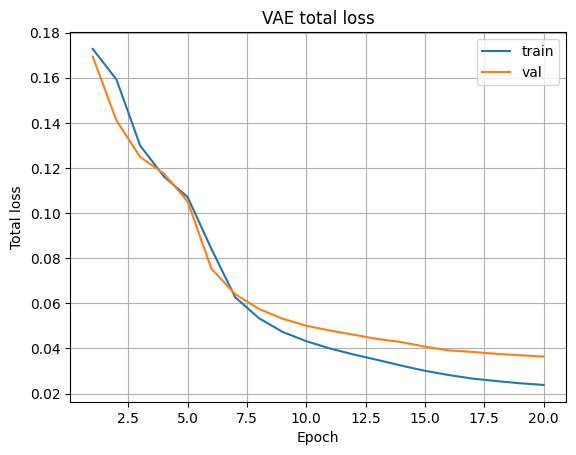

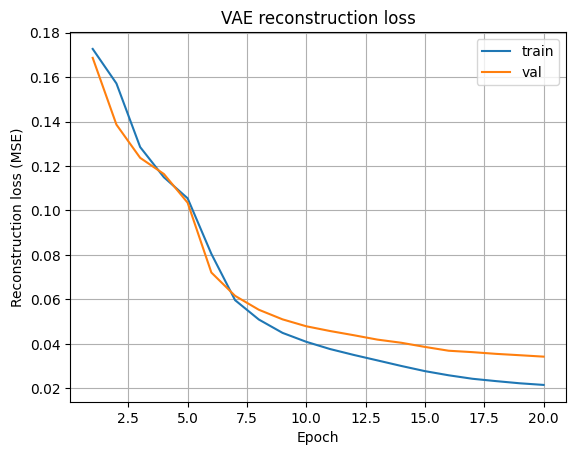

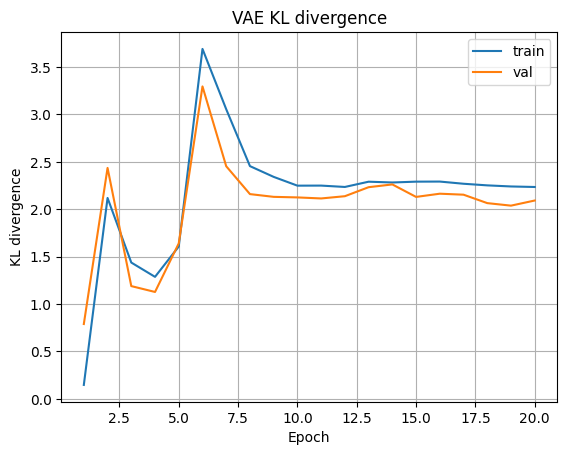

In [22]:
# ******* INSERT YOUR CODE HERE *******

import matplotlib.pyplot as plt

epochs = range(1, EPOCHS + 1)

plt.figure()
plt.plot(epochs, history["train_loss"], label="train")
plt.plot(epochs, history["val_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Total loss")
plt.title("VAE total loss")
plt.legend()
plt.grid()
plt.savefig("vae_total_loss.png", dpi=150)
plt.show()

plt.figure()
plt.plot(epochs, history["train_recon"], label="train")
plt.plot(epochs, history["val_recon"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Reconstruction loss (MSE)")
plt.title("VAE reconstruction loss")
plt.legend()
plt.grid()
plt.savefig("vae_recon_loss.png", dpi=150)
plt.show()

plt.figure()
plt.plot(epochs, history["train_kl"], label="train")
plt.plot(epochs, history["val_kl"], label="val")
plt.xlabel("Epoch")
plt.ylabel("KL divergence")
plt.title("VAE KL divergence")
plt.legend()
plt.grid()
plt.savefig("vae_kl_loss.png", dpi=150)
plt.show()

# ******* INSERT YOUR CODE HERE - END *******

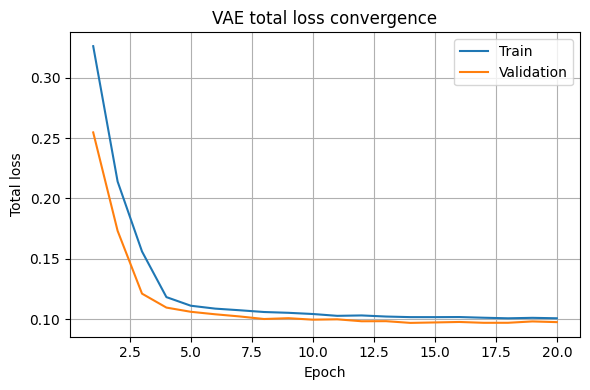

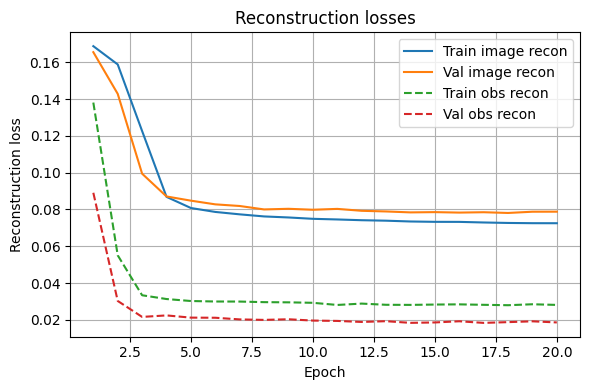

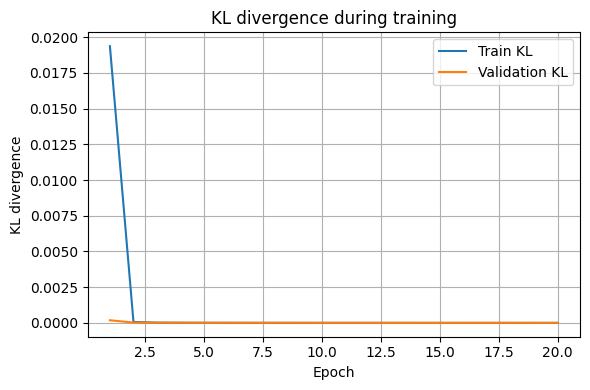

In [30]:
import matplotlib.pyplot as plt

# Unpack histories
train_loss = [x[0] for x in train_history]
train_img  = [x[1] for x in train_history]
train_obs  = [x[2] for x in train_history]
train_kl   = [x[3] for x in train_history]

val_loss = [x[0] for x in val_history]
val_img  = [x[1] for x in val_history]
val_obs  = [x[2] for x in val_history]
val_kl   = [x[3] for x in val_history]

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, train_loss, label="Train")
plt.plot(epochs, val_loss, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Total loss")
plt.title("VAE total loss convergence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(epochs, train_img, label="Train image recon")
plt.plot(epochs, val_img, label="Val image recon")
plt.plot(epochs, train_obs, "--", label="Train obs recon")
plt.plot(epochs, val_obs, "--", label="Val obs recon")
plt.xlabel("Epoch")
plt.ylabel("Reconstruction loss")
plt.title("Reconstruction losses")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,4))
plt.plot(epochs, train_kl, label="Train KL")
plt.plot(epochs, val_kl, label="Validation KL")
plt.xlabel("Epoch")
plt.ylabel("KL divergence")
plt.title("KL divergence during training")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---
### $\color{Red}{Question\ 2.c}$ Latent space analysis (6 marks)

##### Task
- Using reasonable analysis, conclude whether the representation learnt by the self-supervised method will be beneficial for the downstream supervised task. **Empirical evidence** should be provided **however**, references to the performance of the self-superised method with a supervised head on the downstream task will be awarded __0 marks__.

$\color{red}{Response:}$ (Maximum 600 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`


In [ ]:
# Pls use this code cell to excute the code to generate your emprical evidence to support your textual response above

# ******* INSERT YOUR CODE HERE *******

# ******* INSERT YOUR CODE HERE - END *******

Latent stats on validation set:
 mu mean   : -1.16189185064286e-05
 mu std    : 0.00025088360416702926
 mu min/max: -0.0011762267677113414 0.0012636459432542324
 logvar mean: 2.6540399630903266e-05
 logvar std : 0.00026091953623108566


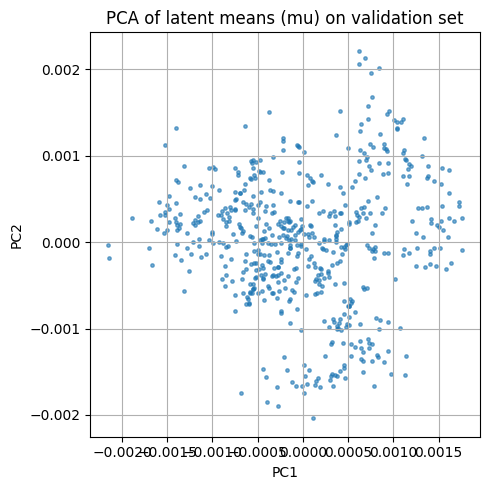

Explained variance ratio (PC1, PC2): [0.16446735 0.1483568 ]


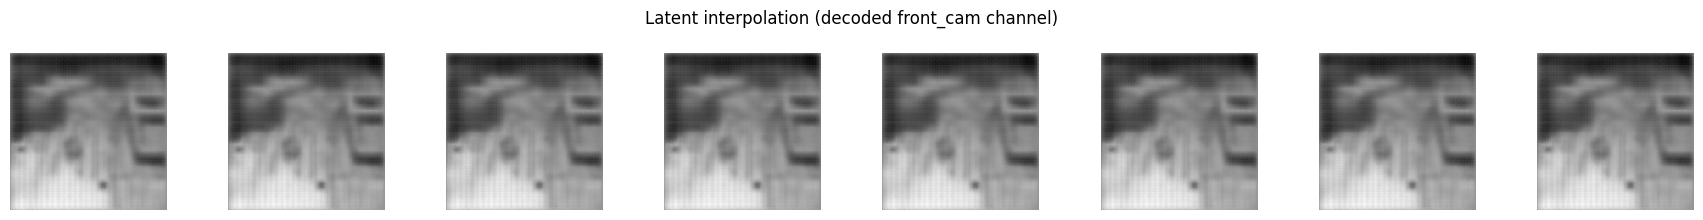

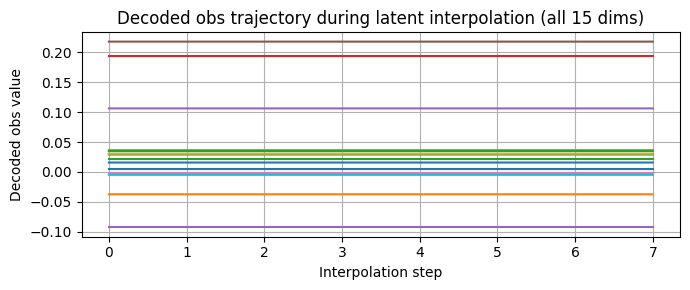

Nearest neighbours indices: [0 1 3 2 4]
Nearest neighbours distances: [0.0000000e+00 4.4139192e-08 6.8157192e-08 8.9870923e-08 1.8083816e-07]


In [31]:
# ===============================
# LATENT SPACE ANALYSIS (MultiModalVAE: images + obs)
# Uses ALL variables case:
#   batch.input["images"] : (B,2,224,224)
#   batch.input["obs"]    : (B,15)
# NO actions, NO supervised head
# ===============================

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ---------- Helper: get latents over a dataloader ----------
def collect_latents_mu_logvar(model, dataloader, device, max_batches=None):
    model.eval()
    mus, logvars = [], []
    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            if max_batches is not None and i >= max_batches:
                break
            images = batch.input["images"].to(device)
            obs = batch.input["obs"].to(device)

            mu, logvar = model.encode(images, obs)   # (B,latent_dim)
            mus.append(mu.cpu())
            logvars.append(logvar.cpu())

    mu_all = torch.cat(mus, dim=0)
    logvar_all = torch.cat(logvars, dim=0)
    return mu_all, logvar_all


# ---------- 1) Latent statistics (collapse check) ----------
mu_all, logvar_all = collect_latents_mu_logvar(model, val_dataloader_vae, device)

print("Latent stats on validation set:")
print(" mu mean   :", mu_all.mean().item())
print(" mu std    :", mu_all.std().item())
print(" mu min/max:", mu_all.min().item(), mu_all.max().item())
print(" logvar mean:", logvar_all.mean().item())
print(" logvar std :", logvar_all.std().item())

# Interpretation hints:
# - If mu std ~ 0 and KL ~ 0 -> collapse.
# - Non-zero mu std + non-zero KL -> latent used.


# ---------- 2) PCA projection (structure, not a single point) ----------
Z = mu_all.numpy()
pca = PCA(n_components=2)
Z2 = pca.fit_transform(Z)

plt.figure(figsize=(5,5))
plt.scatter(Z2[:, 0], Z2[:, 1], s=6, alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of latent means (mu) on validation set")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Explained variance ratio (PC1, PC2):", pca.explained_variance_ratio_)


# ---------- 3) Latent interpolation (smoothness / continuity) ----------
# Choose two samples from ONE batch
model.eval()
with torch.no_grad():
    batch = next(iter(val_dataloader_vae))
    images = batch.input["images"].to(device)
    obs = batch.input["obs"].to(device)

    # Encode
    mu, logvar = model.encode(images, obs)
    z1 = mu[0]
    z2 = mu[1]

    # Interpolate in latent space
    steps = 8
    alphas = torch.linspace(0, 1, steps=steps, device=device)
    z_interp = torch.stack([(1 - a) * z1 + a * z2 for a in alphas], dim=0)  # (steps, latent_dim)

    # Decode (MultiModalVAE returns both recon_images and recon_obs)
    recon_images, recon_obs = model.decode(z_interp)  # recon_images: (steps,2,224,224), recon_obs: (steps,15)

# Visualise front camera channel from reconstructions
fig, axes = plt.subplots(1, steps, figsize=(2.2*steps, 2.2))
for i, ax in enumerate(axes):
    ax.imshow(recon_images[i, 0].cpu().numpy(), cmap="gray")  # channel 0 = front_cam
    ax.axis("off")
plt.suptitle("Latent interpolation (decoded front_cam channel)")
plt.tight_layout()
plt.show()

# Optional: show how state (obs) changes along interpolation
recon_obs_np = recon_obs.cpu().numpy()

plt.figure(figsize=(7,3))
plt.plot(recon_obs_np)
plt.xlabel("Interpolation step")
plt.ylabel("Decoded obs value")
plt.title("Decoded obs trajectory during latent interpolation (all 15 dims)")
plt.grid(True)
plt.tight_layout()
plt.show()


# ---------- 4) (Optional) Nearest neighbours in latent space ----------
# Pick one query latent and find nearest in validation set (no labels needed)
def nearest_neighbours(mu_all, query_idx=0, k=5):
    Z = mu_all.numpy()
    q = Z[query_idx]
    d = np.sum((Z - q)**2, axis=1)
    nn_idx = np.argsort(d)[:k]
    return nn_idx, d[nn_idx]

nn_idx, nn_dist = nearest_neighbours(mu_all, query_idx=0, k=5)
print("Nearest neighbours indices:", nn_idx)
print("Nearest neighbours distances:", nn_dist)

# If you want to visualise the corresponding original images for these neighbours:
# you can iterate through val_dataset_vae[nn_idx[j]] and rebuild images similarly to collate_func.


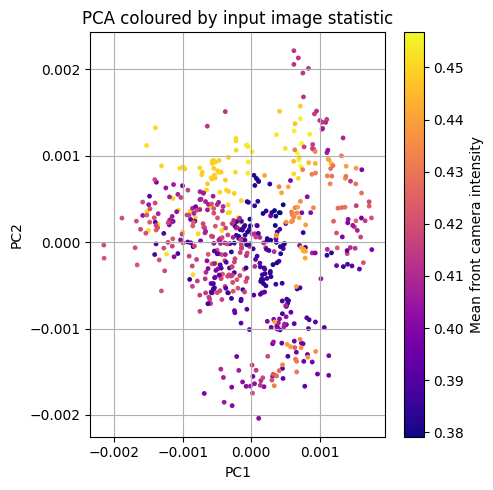

In [32]:
# compute a simple image statistic per sample
img_means = []

model.eval()
with torch.no_grad():
    for batch in val_dataloader_vae:
        imgs = batch.input["images"][:,0].mean(dim=(1,2))  # front_cam mean
        img_means.append(imgs.cpu())

img_means = torch.cat(img_means).numpy()

plt.figure(figsize=(5,5))
plt.scatter(
    Z2[:,0], Z2[:,1],
    c=img_means,
    cmap="plasma",
    s=6
)
plt.colorbar(label="Mean front camera intensity")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA coloured by input image statistic")
plt.grid(True)
plt.tight_layout()
plt.show()


---

## $\color{Red}{Question\ 3}$ Full model training
This question requires you to first develop a supervised head which utilises the latent space from your self-supervised method. You are then required to assess the models performance as well as the model you developed in question 1.c.i on the test set, report the performance and conclude whether self-supervised learning is appropriate for this task.

### $\color{Red}{Question\ 3.a}$ Combining self-supervised model with the downstream task (5 marks)

##### Task
- Develop a model which combines the self-supervised pretraining with a model for performing the downstream task by freezing the self-supervised model and fine-tuning a head for prediction and implement it in the code block below. Markers should be able to retrain your model by running the cell below. You may however, reference previously defined objects (e.g., loaded data and use previously defined functions). The supervised head should at least include any inputs that you did not feed into the self-supervised model. For example, assume you decide to perform self-supervised learning only using front_cam_ob images. You must also include mount_cam_ob, ee_cartesian_pos_ob, ee_cartesian_vel_ob and joint_pos_ob observations in your model.

$\color{red}{Response:}$ (Maximum 200 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`


In [ ]:
# ******* INSERT YOUR CODE HERE *******


# ******* INSERT YOUR CODE HERE - END *******

---
### $\color{Red}{Question\ 3.b}$ Assessing the suitability of self-supervised learning
For the final two questions, you are required to assess the performance of the self-supervised + supervised head model and the end-to-end model that you have trained. Additionally, you are required to holistically evaluate whether self-supervised learning has been beneficial for this task.

#### $\color{Red}{Question\ 3.b.i}$ Assessing the suitability of self-supervised learning (4 marks)

##### Task
- In the code block below, evaluate the performance of the model you trained in question 3.a and the model you trained in question 1.c.i, using the test set. Additionally use the same metrics to train and evaluate the model that you used for question 1.c.i. Markers should be able to run the cell such that both models are run on the appropriate dataset. You may however, reference previously defined objects (e.g., loaded data and use previously defined functions).

$\color{red}{Response:}$ (Maximum 200 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`


In [ ]:
# ******* INSERT YOUR CODE HERE *******


# ******* INSERT YOUR CODE HERE - END *******

---
#### $\color{Red}{Question\ 3.b.ii}$ Justification (5 marks)

##### Task
- Conclude whether the self-supervised pre-training was beneficial for the task of predicting actions. Your answer should not solely focus on final performance but rather be nuianced and balance other model development considerations for example parameter count and speed of convergence. Also, if you believe the comparison between the model trained in question 3.a.i aganst the model trained in question 2.c.i is not _fair_, discuss further experiments which you would perform to reduce the bias in your conclusions. Provide __empirical evidence__ to support your conclusions. __0 marks__ will be awarded if empirical evidence is __not__ provided.

$\color{red}{Response:}$ (Maximum 600 words in text)

`[Pls use this markdown cell to provide your textual Reponse]`


In [ ]:
# Pls use this code cell to excute the code to generate your emprical evidence to support your textual response above

# ******* INSERT YOUR CODE HERE *******

# ******* INSERT YOUR CODE HERE - END *******

# - End of Coursework -